# Import Libraries

In [145]:
#!/bin/env python
import glob
import os
import numpy as np
import numpy.ma as ma
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.colors as mcolors
from scipy.interpolate import griddata
import torch
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from skimage import measure, transform
from scipy.ndimage import label
from scipy import ndimage
import tarfile
import string
import calendar

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install opencv-python==3.4.2.16
#!pip install opencv-contrib-python==3.4.2.16

import cv2
from google.colab.patches import cv2_imshow
print(cv2.__version__)

4.1.2


In [ ]:
!pip install pyMCR

     |████████████████████████████████| 921kB 4.4MB/s 
  Created wheel for pyMCR: filename=pyMCR-0.3.2-cp37-none-any.whl size=26472 sha256=2a4a68834db4cf47a5121d75a42ca383c9aa95822fe24540e820901f4dc29911
  Stored in directory: /root/.cache/pip/wheels/bf/61/c2/59ca0fb0ad90a9f608586e960a20e03449982e39d88ab2be2f
Successfully built pyMCR


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install http://sourceforge.net/projects/matplotlib/files/matplotlib-toolkits/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759570 sha256=f9b7d63aedb85214127e9cf252bcd0ec37a7af0fe7f49125668d35c0f801fc27
  Stored in directory: /tmp/pip-ephem-wheel-cache-vi3hk57g/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap
     |████████████████████████████████| 256kB 727kB/s 
  ERROR: Cannot unpack file /tmp/pip-unpack-tiimity8/matplotlib-toolkits (downloaded 

In [ ]:
from mpl_toolkits.basemap import Basemap,cm

In [ ]:
!pip install netcdf4
import netCDF4

     |████████████████████████████████| 4.7MB 4.3MB/s 
     |████████████████████████████████| 317kB 37.8MB/s 


In [ ]:
!ls

drive  sample_data


# Directory

In [ ]:
DIR = '/content/drive/MyDrive/StageUParis/DATA/H2O/'
DIR_TEST = '/content/drive/MyDrive/StageUParis/Test/'
#DIR='/DATA/IASI/EXTERNAL/SUSTAINABLE/DUFOUR/IASIO3daily_PolEASIA/H2O/'

# Main Code

Données
- Lattitude
- Longitude
- Valeur

In [ ]:
def plotHistogram(img):
  color = ('b','g','r')
  plt.figure()
  for i,col in enumerate(color):
      histr = cv2.calcHist([img],[i],None,[256],[0,256])
      plt.plot(histr,color = col)
      plt.xlim([0,256])
  plt.show()

In [ ]:
deg = .125
size1 = .0625

## LOOP
start = 1
end = 20

# Dates
day = 6
image_type="UT"
year=2008
month=5

## THRESH
global_regions = []
global_contours = []
global_mser = []
global_laplacian = []
global_thresh = 50
global_thresh_down = global_thresh - 5
global_thresh_condition = False

Threshold 50
2008 5 31
Col 83
end read nc


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:182: RuntimeWarning: invalid value encountered in true_divide


end month
Threshold 78
2008 5 31
Col 83
end read nc
end month
Threshold 73
2008 5 31
Col 83
end read nc
end month
Threshold 68
2008 5 31
Col 83
end read nc
end month
Threshold 63
2008 5 31
Col 83
end read nc
end month
Threshold 58
2008 5 31
Col 83
end read nc
end month
Threshold 53
2008 5 31
Col 83
end read nc
end month
Threshold 48
2008 5 31
Col 83
end read nc
end month
Threshold 43
2008 5 31
Col 83
end read nc
end month
Threshold 38
2008 5 31
Col 83
end read nc
end month
Threshold 33
2008 5 31
Col 83
end read nc
end month
Threshold 28
2008 5 31
Col 83
end read nc
end month
Threshold 23
2008 5 31
Col 83
end read nc
end month
Threshold 18
2008 5 31
Col 83
end read nc
end month
Threshold 13
2008 5 31
Col 83
end read nc
end month
Threshold 8
2008 5 31
Col 83
end read nc
end month
Threshold 3
2008 5 31
Col 83
end read nc
end month
Threshold -2


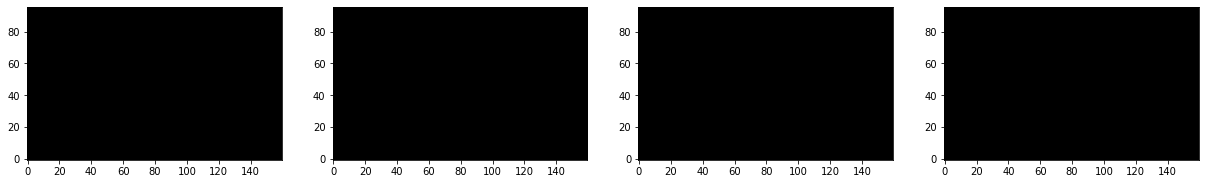

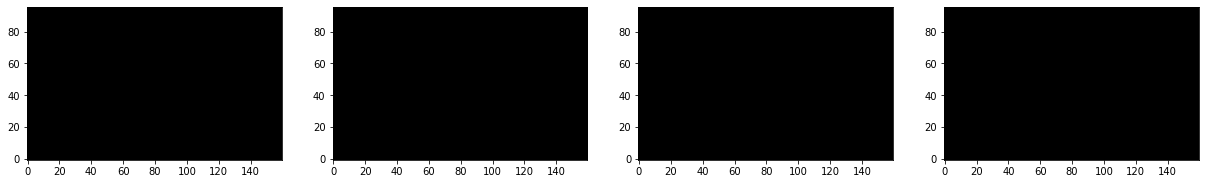

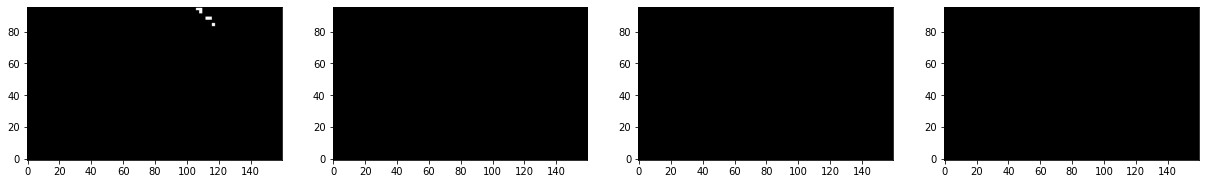

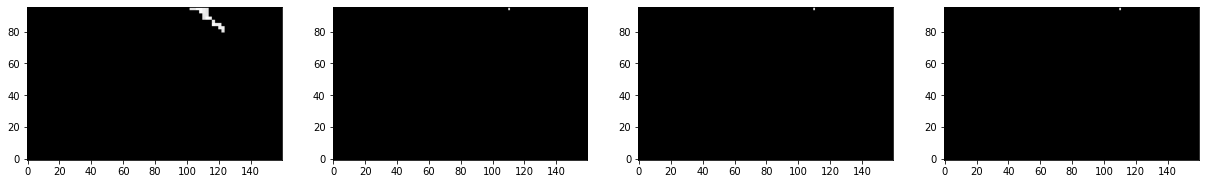

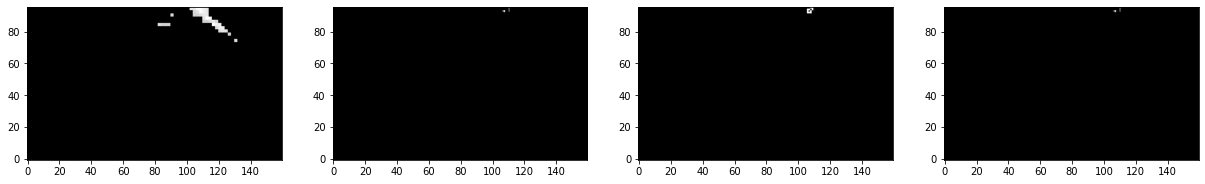

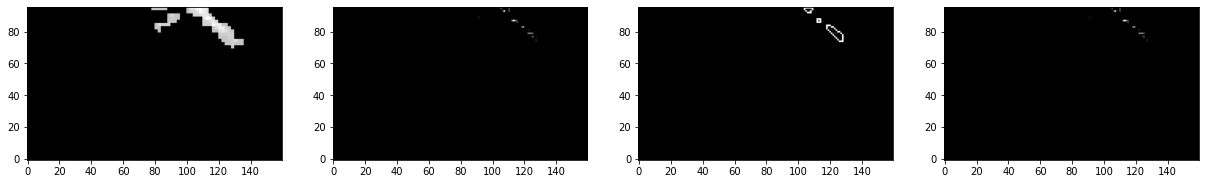

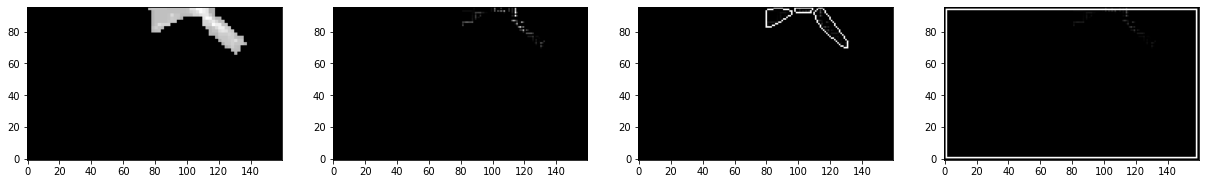

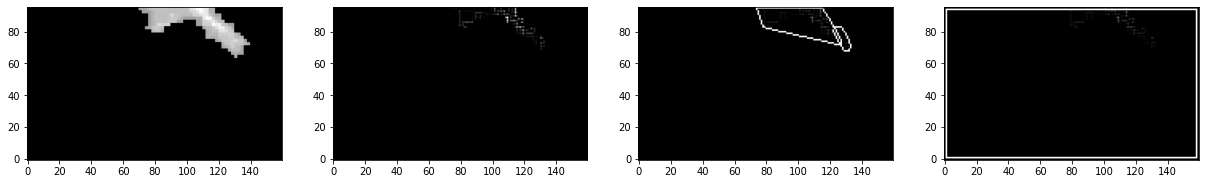

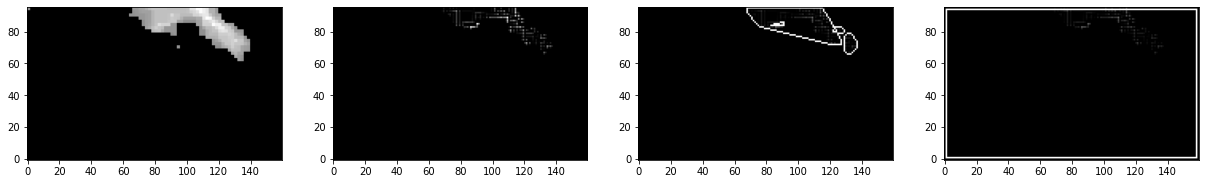

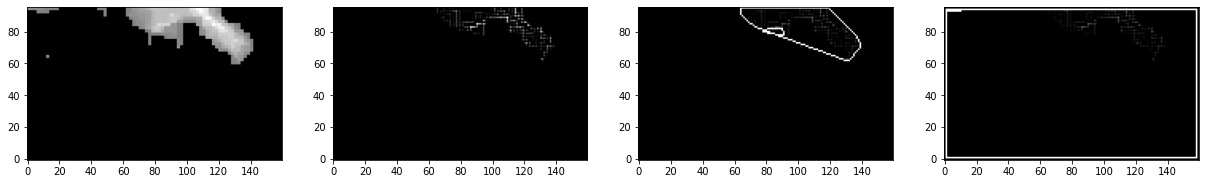

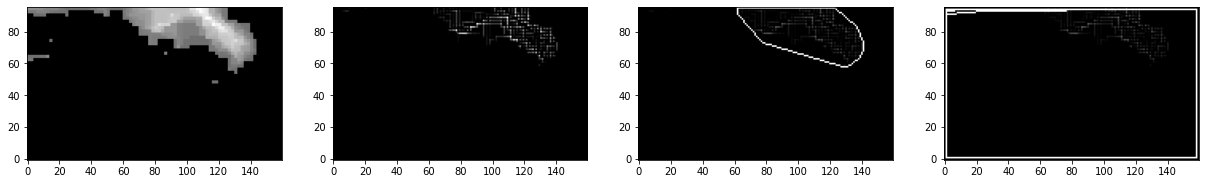

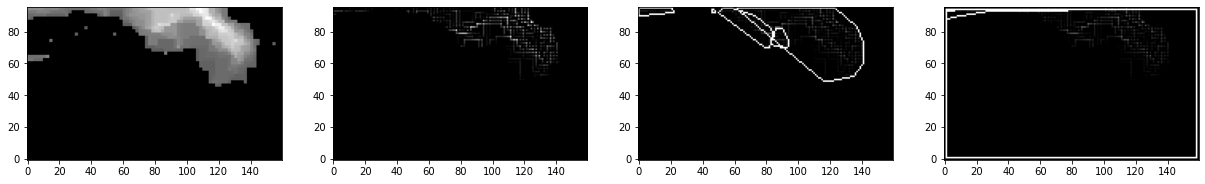

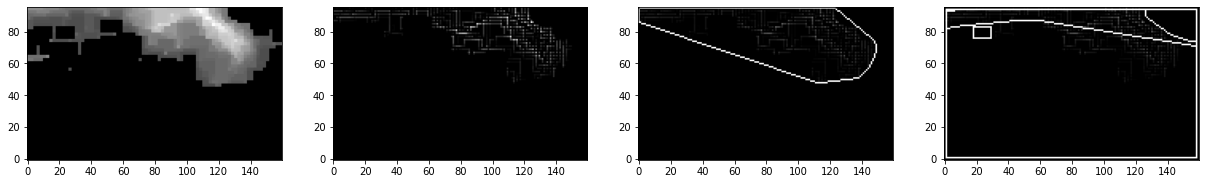

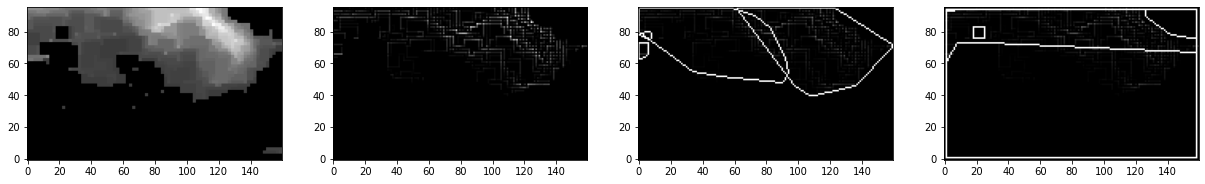

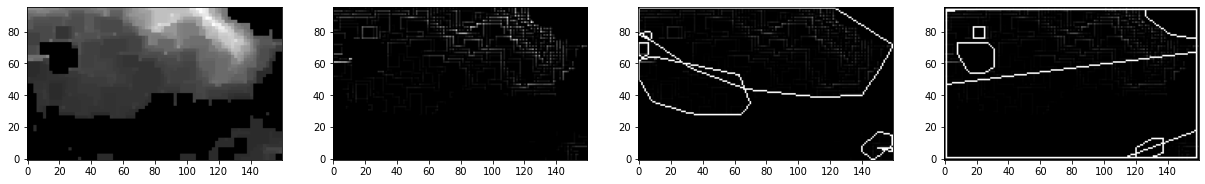

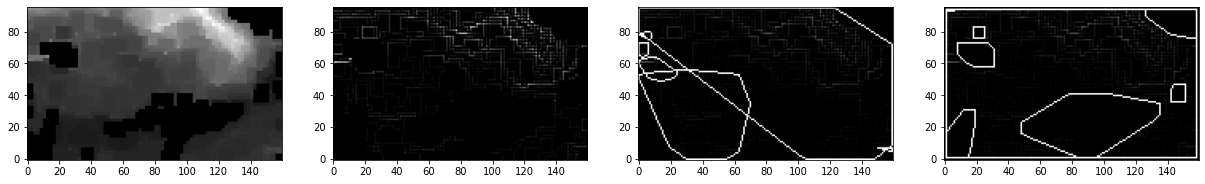

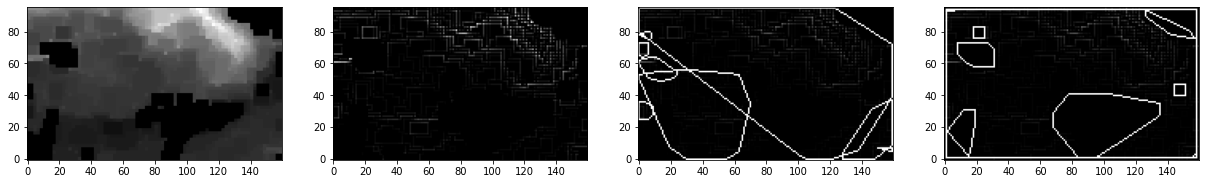

In [ ]:
for i in range(start,end):
  if (i==0):
    continue

  print("Threshold", global_thresh)
  if global_thresh < 0:
    break

  degree = 0.625 # deg * i
  size = 0.3125 # (degree * size1) /  deg
  thres=(i-20)
  iteration=i
  image_name = DIR_TEST + image_type+"-mesh-"+str(year)+"%02d"%month+"%02d"%day+"-i-0"+str(i)+".png"
  # plot_sequence_images(degree = deg2, size = size2, thres=(i-20), iteration=i, image_type=image_type, day=day )

  lat_g = np.arange(20.,50.,degree)
  lon_g = np.arange(100.,150.,degree)

  #initialization
  colgrid = np.zeros([lat_g.shape[0],lon_g.shape[0]], np.uint8)

  for year in range(2008,2009):
    for month in range(5,6):
      ndays = calendar.mdays[month] + (month==2 and calendar.isleap(year))
      print(year,month,ndays)

      for dd in range (day,day+1):
        
        fname = DIR+'IASIdaily_'+str(year)+"%02d"%month+"%02d"%dd+'.nc'

        #read IASI data in nc archive
        if not(os.path.isfile(fname)):
          continue

        nc = netCDF4.Dataset(fname)
        flg = nc.variables['flag'][:]
        mask1 = (flg == 0)
        
        lat = nc.variables['lat'][mask1]
        lon = nc.variables['lon'][mask1]
        col = nc.variables[image_type][mask1]
        nc.close()

        print("Col",int(col.max() - 5))
        if global_thresh < int(col.max() - 5) and global_thresh_condition == False:
          global_thresh = int(col.max() -5)
          global_thresh_condition = True
      
        print('end read nc')
        mask2 = (np.isnan(col) == False) 

        # gridding the data
        for ilat in range(lat_g.shape[0]):
          for ilon in range(lon_g.shape[0]):
            # Grille régulier
            # 25 km
            # 0 25 degrée lattitude et longitude

            # Grille regulier of 0.125 degree
            maskgrid = (lat[:] >= (lat_g[ilat] - size)) & (lat[:] < (lat_g[ilat] + size)) & (lon[:] >= (lon_g[ilon] - size)) & (lon[:] < (lon_g[ilon] + size))
            
            # Defining invalid data
            mask = mask2 & maskgrid

            # Add a media filter for the grill regulier
            isMask = (len(col[mask]) != 0) & (col[mask] >= thres).all()

            if len(col[mask]) != 0:
              median = np.mean(col[mask])
              #if (median >= global_thresh_down and median <= global_thresh):
              if median >= global_thresh:
                colgrid[ilat,ilon] = median

        # We mark the values at colgrid as invalid because they are maybe false positives or bad sampling
        #colgrid = ma.masked_values(colgrid, 0.)
        bigger_points = ndimage.grey_dilation(colgrid, size=(10, 10), structure=np.ones((10, 10)))

        """
        for ilat in range(lat_g.shape[0]):
          for ilon in range(lon_g.shape[0]):
            # iteration 0
            if colgrid[ilat,ilon] == 0:
              colgrid[ilat,ilon] = np.mean(colgrid)
              #colgrid[ilat,ilon] = bigger_points[ilat, ilon]
        """

        v_x, v_y = np.meshgrid(lon_g, lat_g)
        gradx, grady = np.gradient(colgrid, edge_order=1)

        data = np.full((colgrid.shape[0], colgrid.shape[1]), colgrid, np.uint8)
        img_bgr = cv2.cvtColor(data, cv2.COLOR_GRAY2BGR)
        gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        #gray = cv2.normalize(gray, np.ones((lon_g.shape[0], lat_g.shape[0])) , 0, 255, cv2.NORM_MINMAX )

        scale_percent = 200 # percent of original size
        width = int(gray.shape[1] * scale_percent / 100)
        height = int(gray.shape[0] * scale_percent / 100)
        dim = (width, height)
        gray = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)

        kernel = np.ones((3,3),np.uint8)
        closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations = 3)
        image_close = closing.copy()

        image_large_close = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, np.ones((9,9),np.uint8), iterations = 3)
        #image_large_close = cv2.medianBlur(image_large_close, 3)
        #image_large_close1 = np.where(image_large_close == 0, image_large_close.mean(), image_large_close)

        image_holes = image_close.copy()

        # DILATE HOLES
        image_holes = np.where(image_holes == 0, 255, image_holes)
        image_holes = np.where(image_holes != 255, 0, image_holes)
        image_holes_dilate = cv2.morphologyEx(image_holes, cv2.MORPH_DILATE, np.ones((3,3),np.uint8), iterations = 2)
        image_holes_dilate_inv = cv2.bitwise_not(image_holes_dilate)
        
        ## IMAGE PAINTIN
        #impaintint = image_close.copy()
        #test_i_c = image_close.copy()
        #if i >= 8: # 15:
        #  test_i_c = np.where(test_i_c == 0, 255, test_i_c)
        #  test_i_c = np.where(test_i_c != 255, 0, test_i_c)
        #  impaintint = cv2.inpaint(image_close, test_i_c, 3, cv2.INPAINT_NS)
        
        #mask_path_img = DIR_TEST + 'test_image_ps3.jpg'
        ##mask_path_img = 'mask_2.jpg'
        #mask_file = cv2.imread(mask_path_img, cv2.IMREAD_GRAYSCALE)
        #mask_file = cv2.resize(mask_file, dim, interpolation = cv2.INTER_AREA)
        #impaintint = cv2.inpaint(image_close, mask_file, 6, cv2.INPAINT_TELEA)

        gray = image_close.copy()
        global_regions.append(gray)

        ## Below code convert image gradient in both x and y direction
        image_laplacian = cv2.Laplacian(gray, cv2.CV_16U, ksize=3) 
        image_laplacian = np.uint8(np.absolute(image_laplacian))
        image_laplacian = cv2.bitwise_and(image_laplacian,image_laplacian,mask = image_holes_dilate_inv)

        global_laplacian.append(image_laplacian)
        ## Below code convert image gradient in x direction
        sobelx= cv2.Sobel(gray, 0, dx=1,dy=0)
        sobelx= np.uint8(np.absolute(sobelx))
        ## Below code convert image gradient in y direction
        sobely= cv2.Sobel(gray, 0, dx=0,dy=1)
        sobely = np.uint8(np.absolute(sobely))

        image_contour = image_laplacian.copy()
        edge = cv2.Canny(image_contour, colgrid.min(), colgrid.max())

        contours, h = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        for c in contours:
          hull = cv2.convexHull(c)
          cv2.drawContours(image_contour, [hull], 0, (255,255, 255), 1)

        global_contours.append(contours)

        #Create MSER object
        mser = cv2.MSER_create()
        image_mser = image_laplacian.copy()

        #detect regions in gray scale image
        regions, bboxes = mser.detectRegions(gray)

        global_mser.append(regions)

        hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
        isClosed = True
        # Blue color in BGR 
        color = (255, 0, 0) 
          
        # Line thickness of 2 px 
        thickness = 1

        cv2.polylines(image_mser, hulls,isClosed, color, thickness)
        #image_mser = cv2.bitwise_and(image_mser,image_mser,mask = image_holes_dilate_inv)

        _, labels, _, _ = cv2.connectedComponentsWithStats(image_laplacian, connectivity=8, ltype=cv2.CV_32S) 

        # Map component labels to hue val
        label_hue = np.uint8(170 * labels/np.max(labels))
        blank_ch = 255*np.ones_like(label_hue)
        labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

        # cvt to BGR for display
        labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

        # set bg label to black
        labeled_img[label_hue==0] = 0

        fig, (ax0,ax1,ax2,ax3) = plt.subplots(1,4, figsize=(21,15))
        ax0.imshow(gray, cmap="gray")
        ax0.invert_yaxis()
        ax1.imshow(image_laplacian, cmap="gray")
        ax1.invert_yaxis()
        ax2.imshow(image_contour, cmap="gray")
        ax2.invert_yaxis()
        ax3.imshow(image_mser, cmap="gray")
        ax3.invert_yaxis()

  global_thresh -= 5
  global_thresh_down -= 5
  print('end month')

False


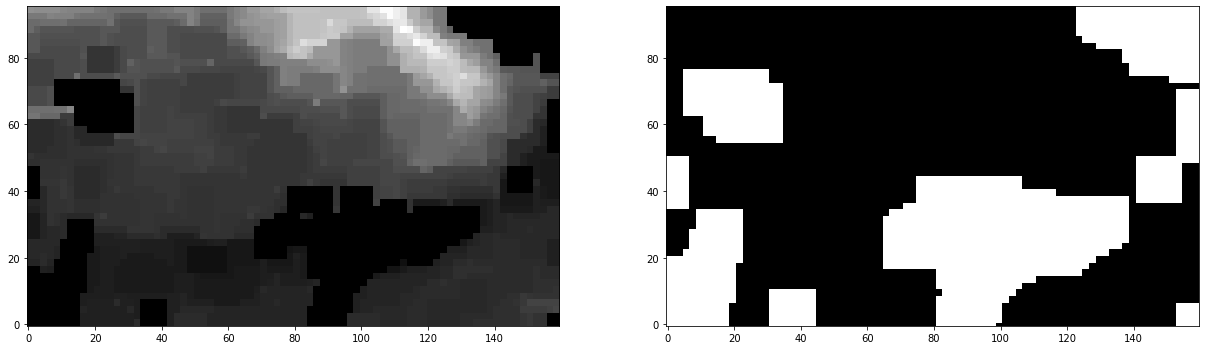

In [ ]:
orig = image_close.copy()
test = gray.copy()

test2 = cv2.GaussianBlur( test, (3,3), 0 )
# test3 = cv2.medianBlur(orig, 3) 

test3 = orig.copy()

im_erod = cv2.morphologyEx(test3, cv2.MORPH_DILATE, np.ones((2,2),np.uint8), iterations = 3)

#test3 = cv2.normalize(test3, np.ones((test3.shape[0], test3.shape[1])) , 0, 255, cv2.NORM_MINMAX )

t_ = test3.copy()

t_ = np.where(t_ == 0, 255, t_)
t_ = np.where(t_ != 255, 0, t_)
t_dilate = cv2.morphologyEx(t_, cv2.MORPH_DILATE, np.ones((3,3),np.uint8), iterations = 3)

t_paint = cv2.inpaint(test3, t_, 3, cv2.INPAINT_NS) # INPAINT_TELEA
#image_large_close[image_large_close == 0] = np.mean(colgrid)

#test3 = np.where(test3 == 0, test3.mean(), test3)

## Below code convert image gradient in both x and y direction
test_laplacian = cv2.Laplacian(test3, cv2.CV_8UC1, ksize=3) 
test_laplacian = np.uint8(np.absolute(test_laplacian))

mask_inv = cv2.bitwise_not(t_dilate)
test_laplacian = cv2.bitwise_and(test_laplacian,test_laplacian,mask = mask_inv)


### MSER

#Create MSER object
mser = cv2.MSER_create()

test_mser = test3.copy()
test_mser = cv2.bitwise_and(test_mser,test_mser,mask = mask_inv)
mycolgrid = colgrid.copy()

mycolgrid = ma.masked_values(mycolgrid, 0.)


#mser.setPass2Only(1)

print(mser.getPass2Only())


#detect regions in gray scale image
regions2, bboxes2 = mser.detectRegions(mask_inv)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions2]
isClosed = True
# Blue color in BGR 
color = (255, 0, 0) 
# Line thickness of 2 px 
thickness = 1

cv2.polylines(test_mser, hulls,isClosed, color, thickness)

f1, (ax1,ax2) = plt.subplots(1, 2, figsize=(21,15))
ax1.imshow(test3 , cmap="gray")
ax1.invert_yaxis()
ax2.imshow(t_dilate , cmap="gray")
ax2.invert_yaxis()

## hist
#ax1.hist(test3.ravel(),255,[0,255])

i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15


'\nt_lap0 = test_global_lap[0]\nt_lap3 = test_global_lap[1]\n\n_, bin_gray = cv2.threshold(t_lap0, 0, 255, cv2.THRESH_OTSU)\n#bin_gray = cv2.morphologyEx(bin_gray, cv2.MORPH_DILATE, np.ones((3, 3), dtype=int))\n\nimage_end = cv2.addWeighted(t_lap0,1,t_lap3,.7,0)\nf, (ax1) = plt.subplots(1, 1, figsize = (11,8))\nax1.imshow(t_lap0, cmap="gray")\nax1.invert_yaxis()\n'

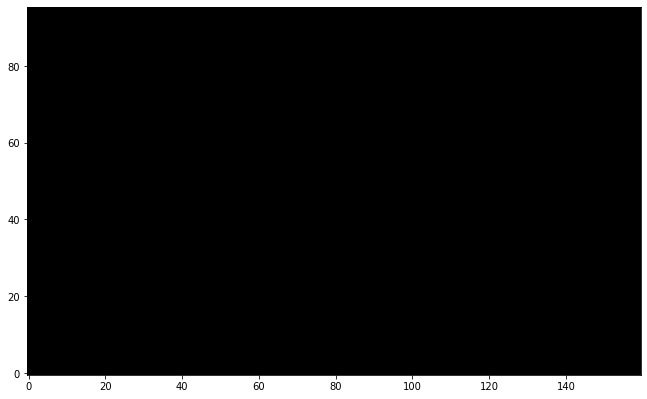

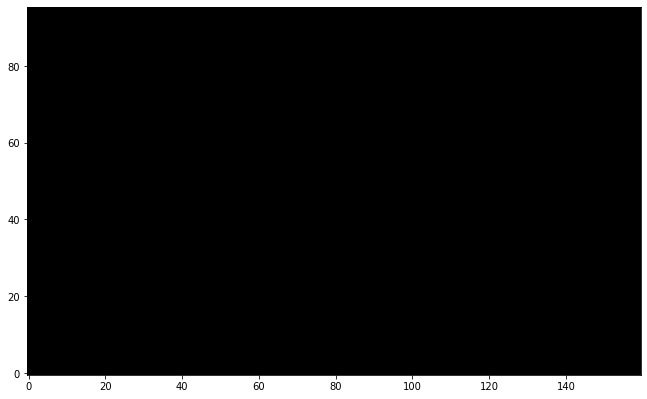

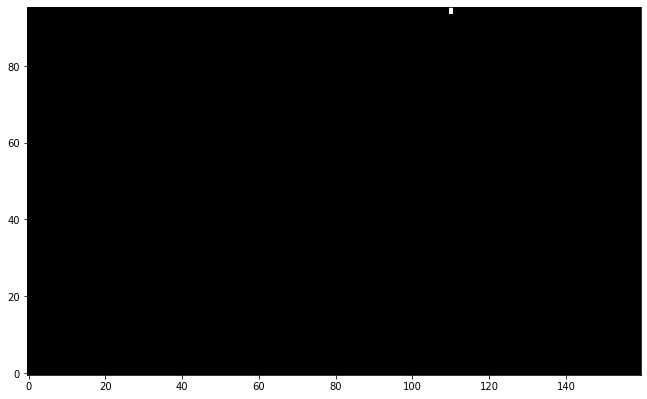

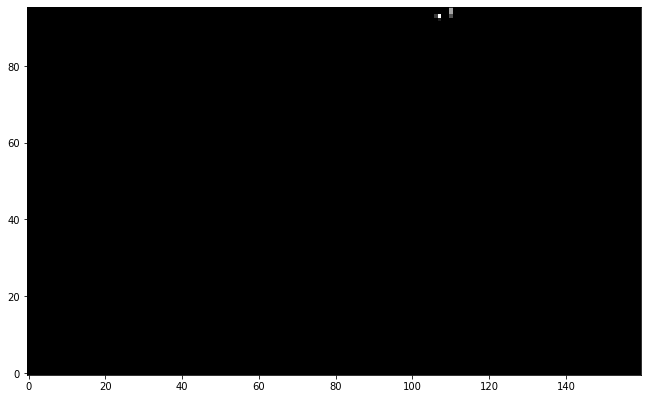

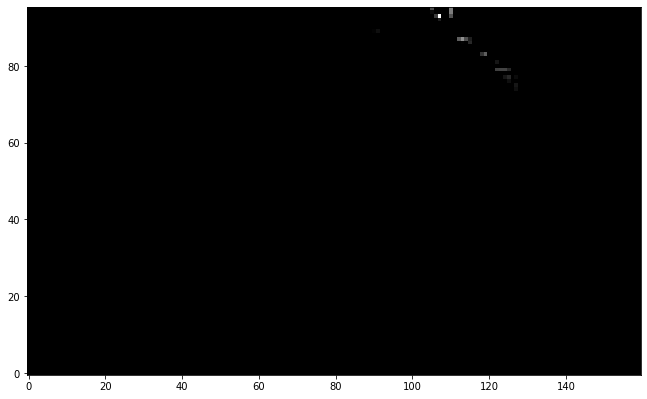

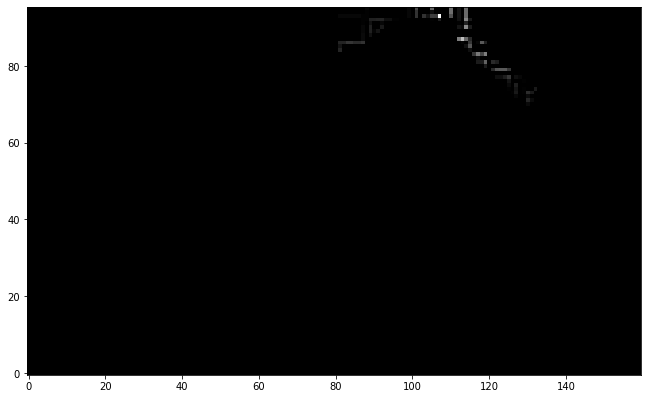

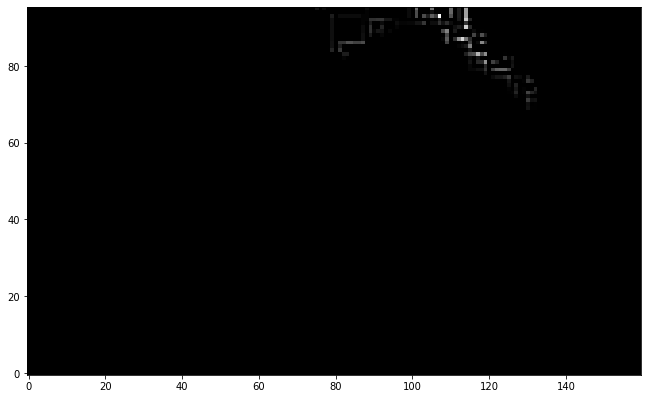

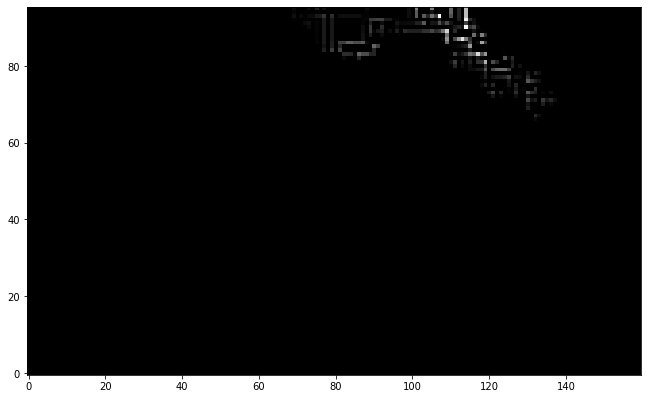

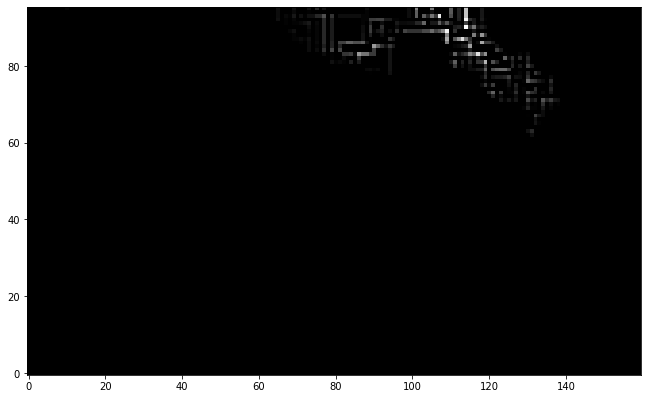

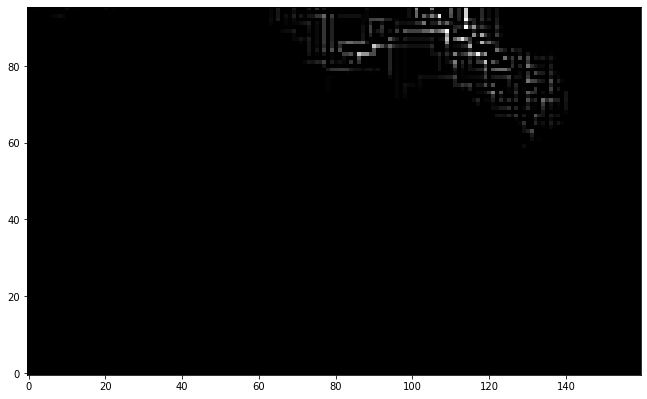

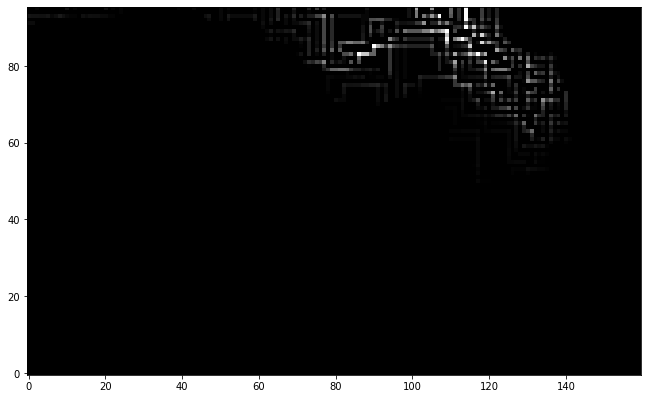

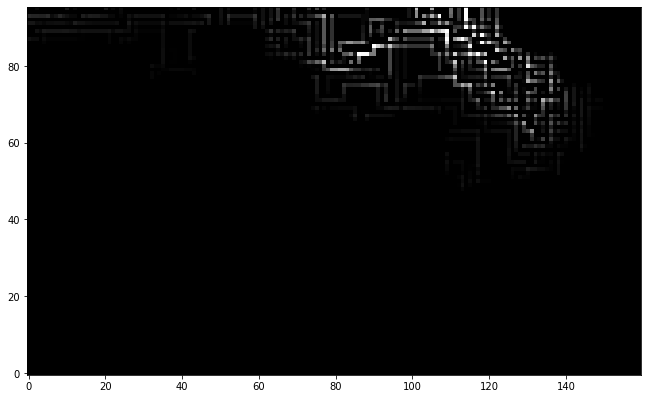

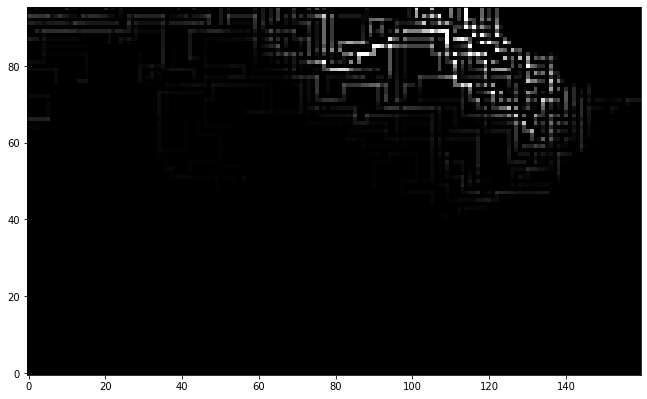

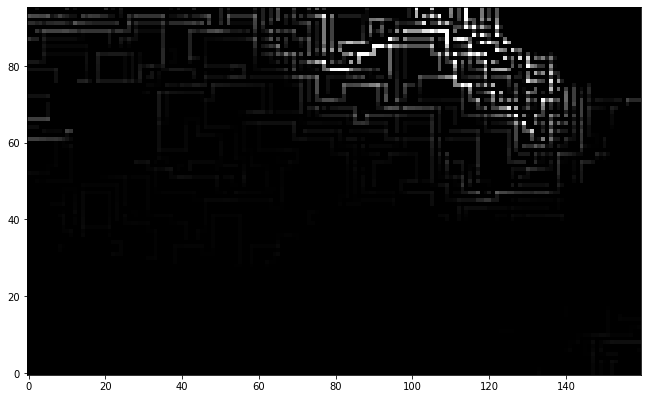

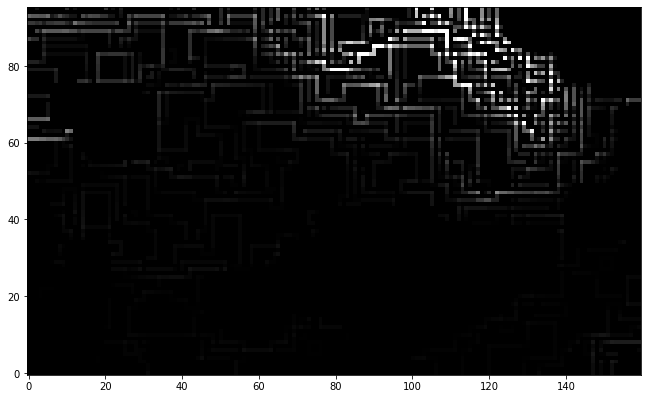

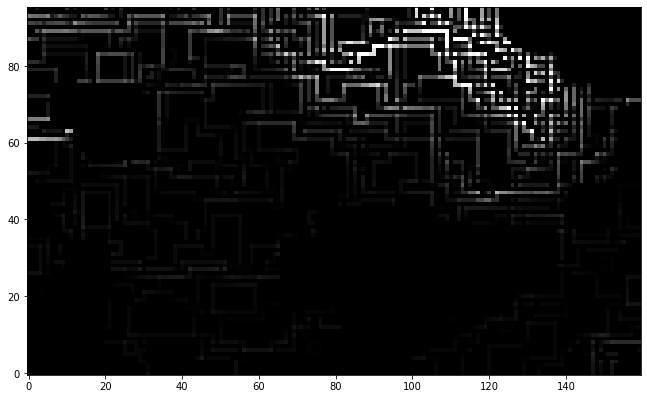

In [ ]:
test_global_lap = global_laplacian.copy()

i = 0
for image in range(len(test_global_lap) - 1):
  print("i", i)
  if i == 0:
    image1 = test_global_lap[i]
  else:
    image1 = image3

  image2 = test_global_lap[i + 1]
  image3 = cv2.addWeighted(image1,1,image2,.7,0)
  f, (ax1) = plt.subplots(1, 1, figsize = (11,8))
  ax1.imshow(image3, cmap="gray")
  ax1.invert_yaxis()
  f.savefig(DIR_TEST + image_type + "/gradient/" + image_type + "_gradient_" + str(year) + "-" + str(month) + "-" + str(day) + "_deg_" + str(degree) + "_i_0" + str(i) + ".png", pad_inches=.01)
  i += 1


"""
t_lap0 = test_global_lap[0]
t_lap3 = test_global_lap[1]

_, bin_gray = cv2.threshold(t_lap0, 0, 255, cv2.THRESH_OTSU)
#bin_gray = cv2.morphologyEx(bin_gray, cv2.MORPH_DILATE, np.ones((3, 3), dtype=int))

image_end = cv2.addWeighted(t_lap0,1,t_lap3,.7,0)
f, (ax1) = plt.subplots(1, 1, figsize = (11,8))
ax1.imshow(t_lap0, cmap="gray")
ax1.invert_yaxis()
"""

MAX 5000
i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15


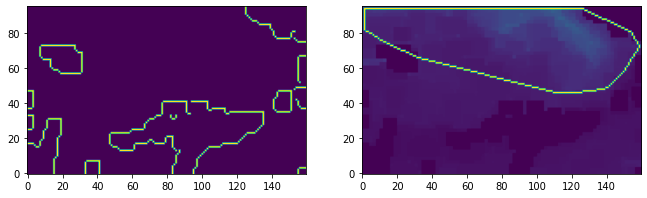

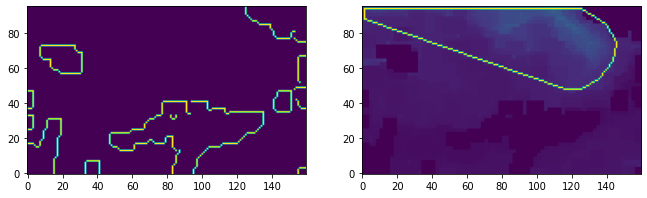

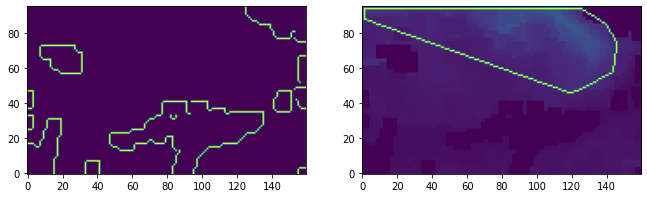

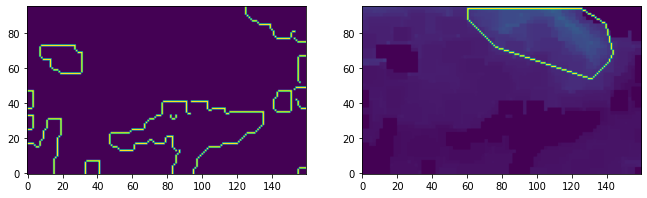

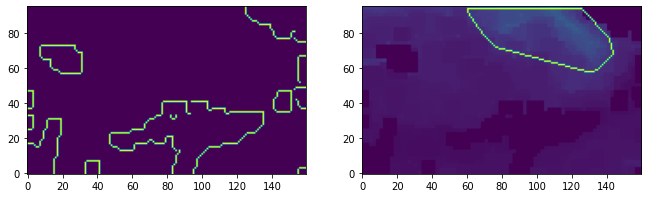

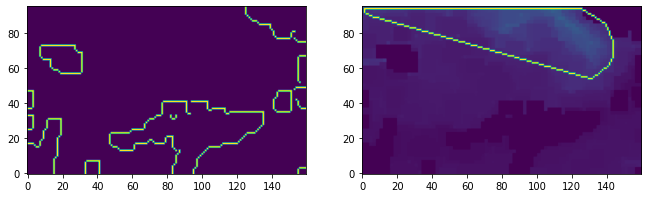

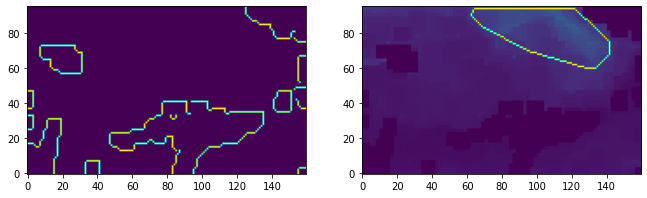

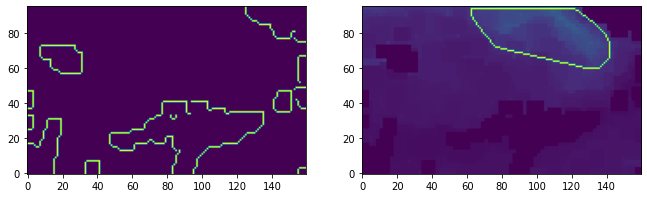

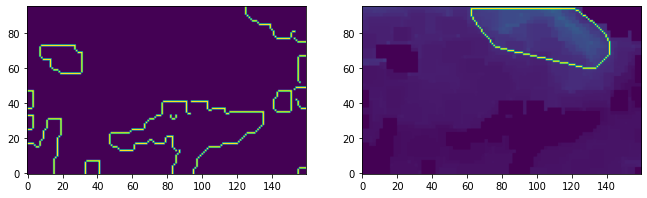

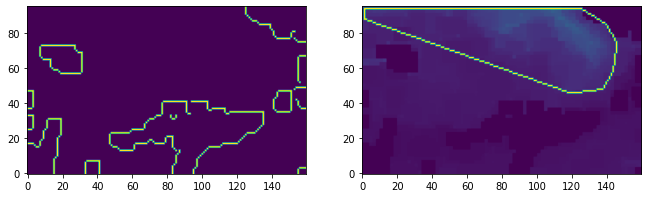

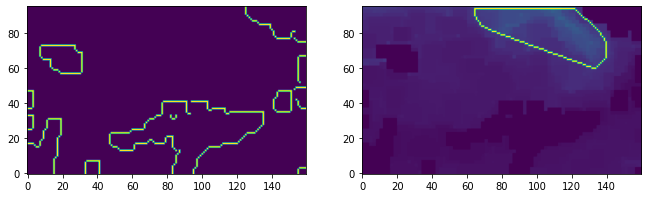

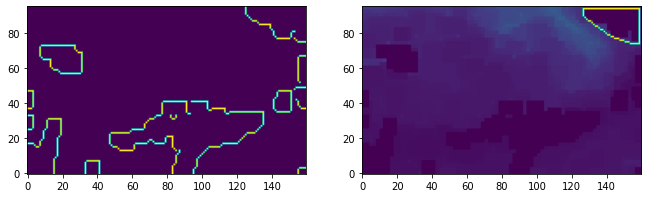

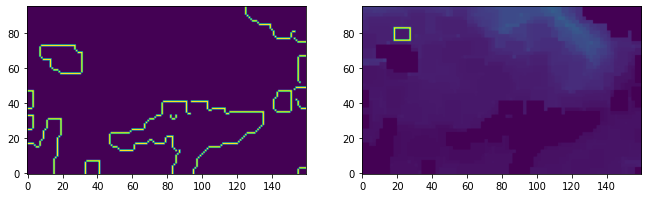

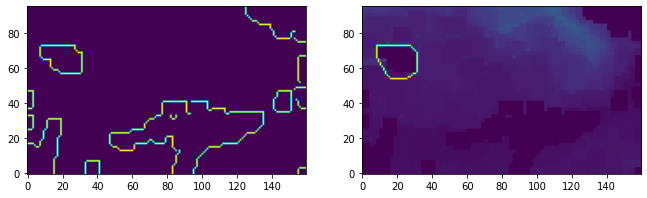

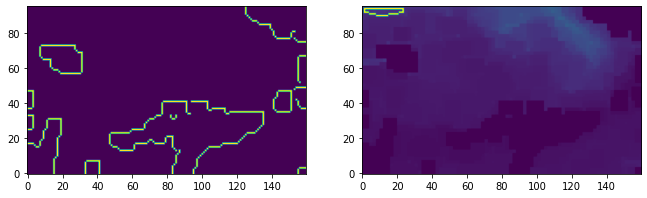

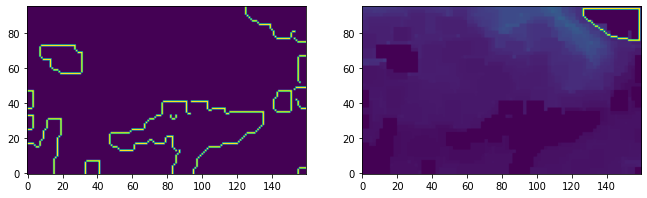

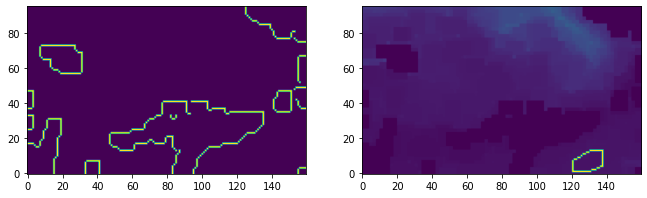

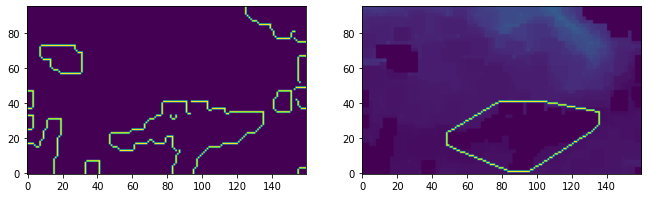

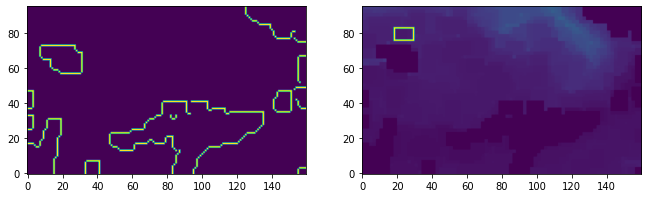

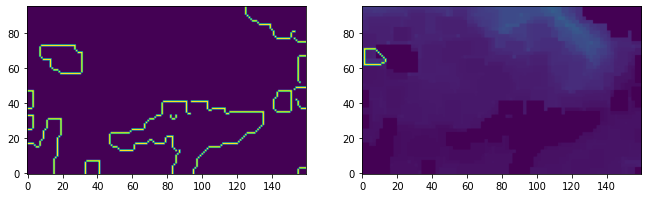

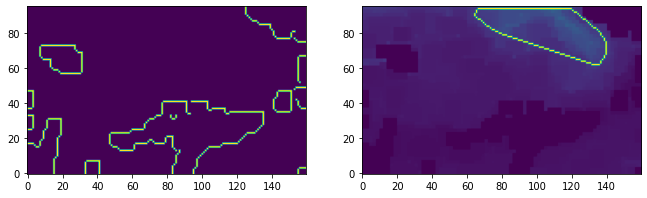

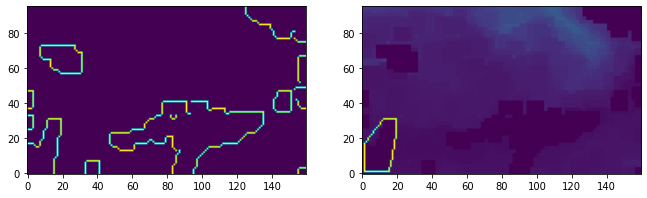

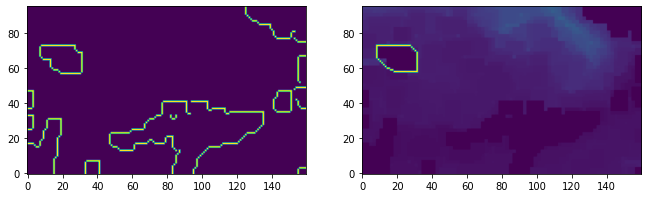

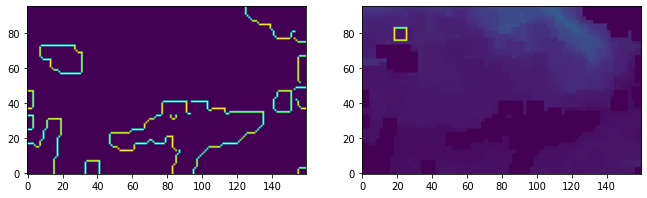

In [161]:
## test 28/03

test_global_regs = global_regions.copy()
#Create MSER object
mser = cv2.MSER_create()
#mser.setMinArea(1)
mser.setMaxArea(5000)
#mser.setPass2Only(1)

print("MAX", mser.getMaxArea())

i = 0
for image in range(len(test_global_regs) - 1):
  print("i", i)
  if i == 0:
    image1 = test_global_regs[i]
  else:
    image1 = image3

  image2 = test_global_regs[i + 1]
  image3 = cv2.addWeighted(image1,1,image2,.7,0)

  image4 = test_global_regs[i]

  t_ = image4.copy()
  t_ = np.where(t_ == 0, 255, t_)
  t_ = np.where(t_ != 255, 0, t_)
  #t_dilate = cv2.morphologyEx(t_, cv2.MORPH_DILATE, np.ones((3,3),np.uint8), iterations = 2)
  #mask_inv = cv2.bitwise_not(t_dilate)
  _edge = cv2.Canny(t_, mycolgrid.min(), mycolgrid.max())

  test_mser = image3.copy()
  _blank1 = np.zeros(test_mser.shape, np.uint8)
  _blank2 = np.zeros(test_mser.shape, np.uint8)

  #test_mser = cv2.bitwise_and(test_mser,test_mser,mask = mask_inv)
  regions2, boundingBoxes = mser.detectRegions(test_mser)
  regions2 = sorted(regions2, key=cv2.contourArea, reverse=True)

  for box in boundingBoxes:
    x, y, w, h = box
    cv2.rectangle(_blank1, (x, y), (x+w, y+h), (255, 255, 255), 1)
  
  regions3, boundingBoxes3 = mser.detectRegions(_edge)
  regions3 = sorted(regions3, key=cv2.contourArea, reverse=True)

  #if i == len(test_global_regs) - 2:
  #  j = 0
  #  for c in regions2:
  #    temp = image4.copy()
  #    hull = cv2.convexHull(c)
  #    cv2.drawContours(temp, [hull], 0, (255,255, 255), 1)
  #    f, (ax1,ax2) = plt.subplots(1, 2, figsize=(11,8))
  #    ax1.imshow(_edge)
  #    ax1.invert_yaxis()
  #    ax2.imshow(temp)
  #    ax2.invert_yaxis()
  #    #f.savefig(DIR_TEST + image_type+"-mser-"+str(year)+"%02d"%month+"%02d"%dd+"-i-0"+str(i)+".png", pad_inches=1)
  #    j+=1

  
  hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions2]
  isClosed = True
  # Blue color in BGR 
  color = (255, 0, 0) 
  # Line thickness of 2 px 
  thickness = 1

  _hulls = np.array(hulls, dtype=np.object)

  #retval	=	cv2.ShapeDistanceExtractor.computeDistance(	_hulls, _hulls	)
  
  cv2.polylines(_blank2, hulls,isClosed, color, thickness)
  
  f, (ax0, ax1,ax2,ax3) = plt.subplots(1, 4, figsize = (21,8))
  ax0.imshow(test_mser, cmap="gray")
  ax0.invert_yaxis()
  ax1.imshow(t_, cmap="gray")
  ax1.invert_yaxis()
  ax2.imshow(_blank1, cmap="gray")
  ax2.invert_yaxis()
  ax3.imshow(_blank2, cmap="gray")
  ax3.invert_yaxis()
  #f.savefig(DIR_TEST + image_type + "/mser/" + image_type + "_mser_" + str(year) + "-" + str(month) + "-" + str(day) + "_deg_" + str(degree) + "_i_0" + str(i) + ".png", pad_inches=.01)
  i += 1


i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15


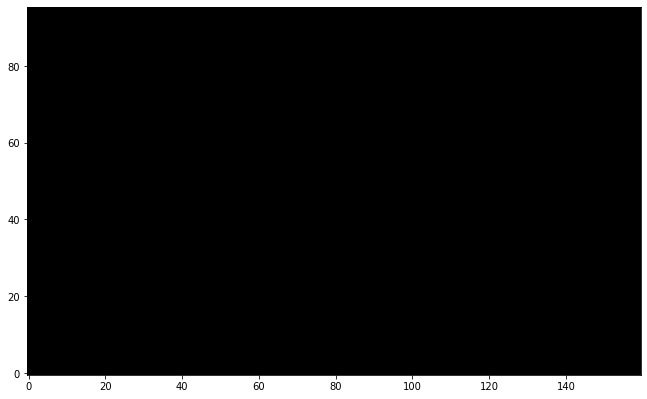

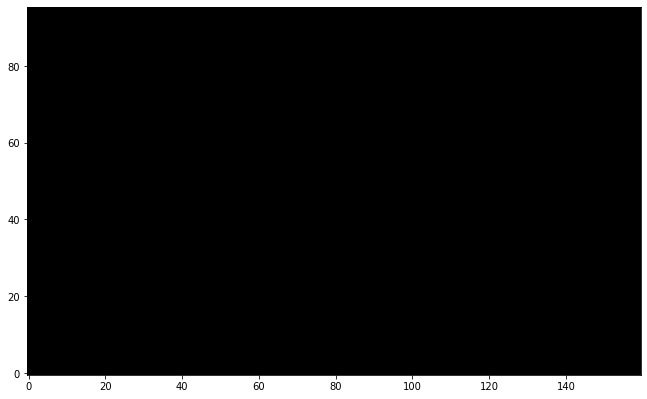

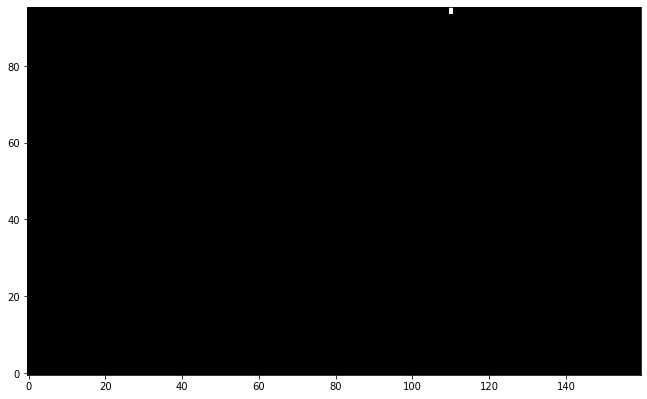

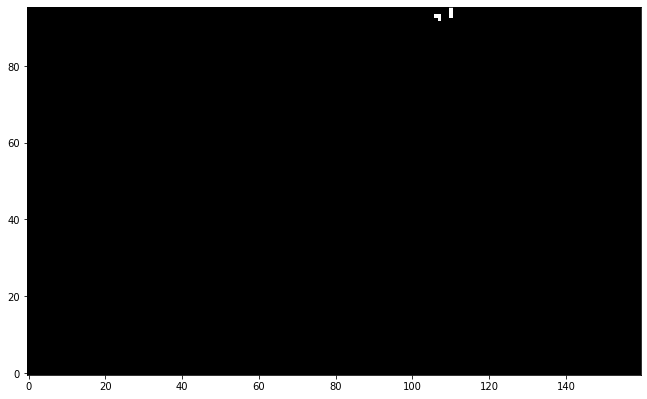

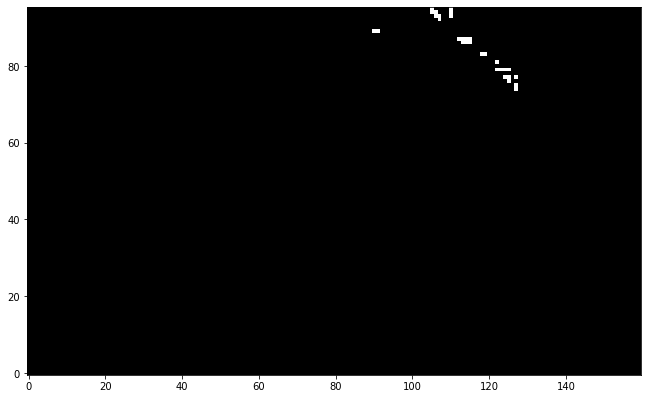

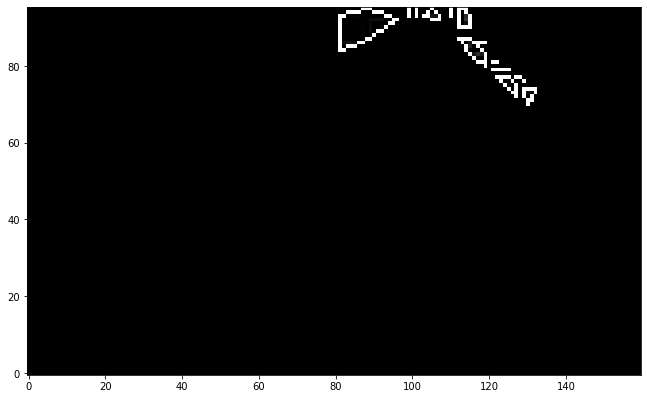

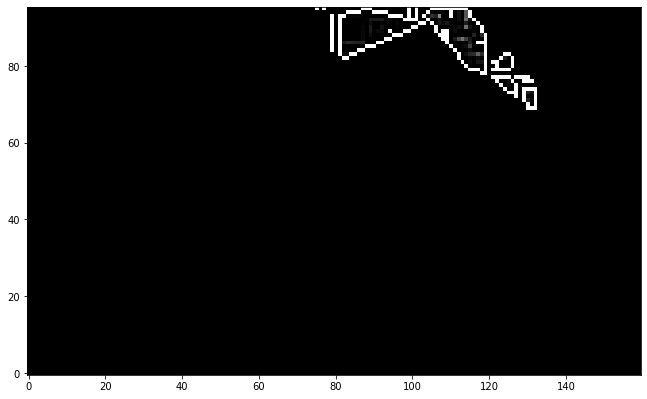

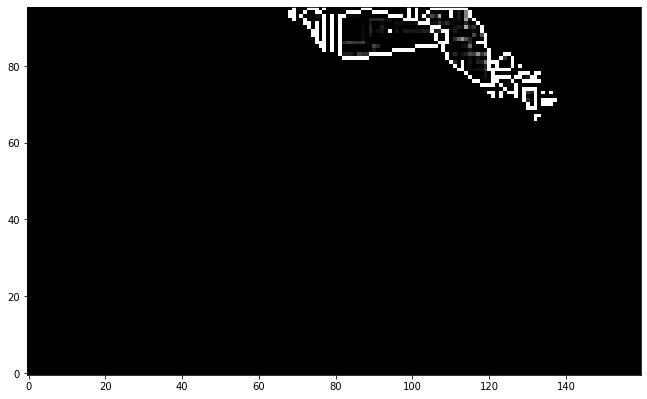

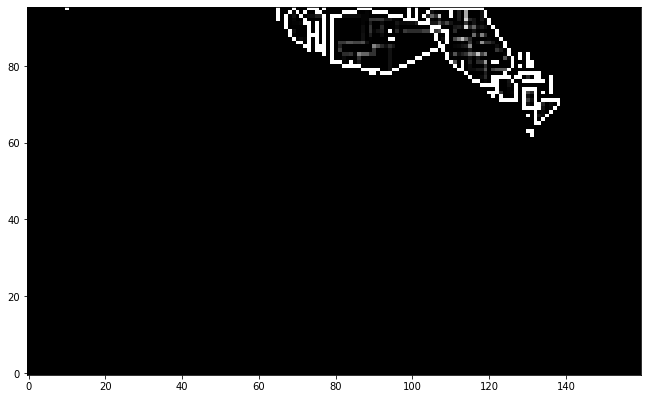

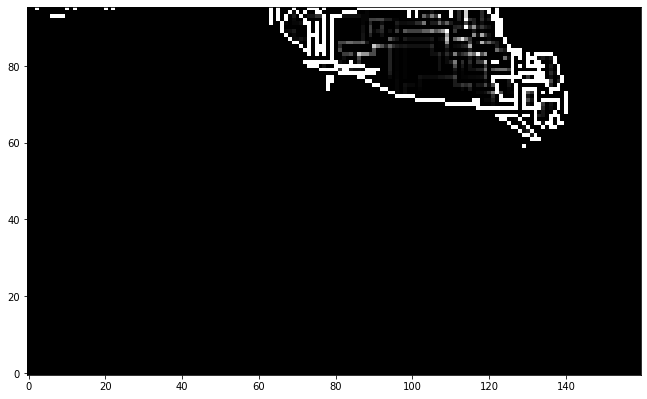

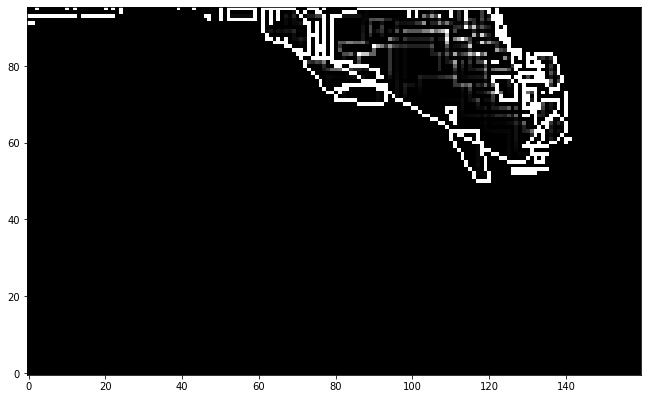

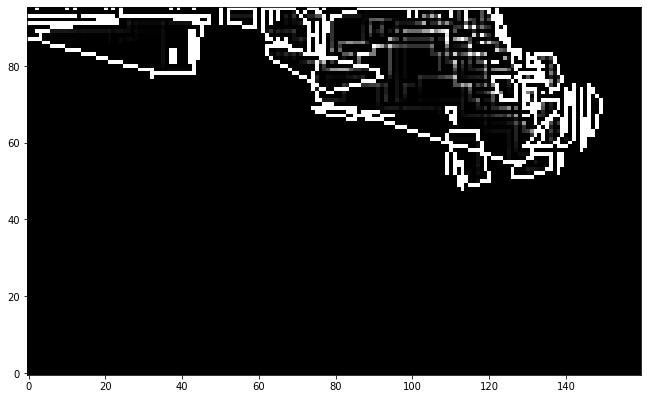

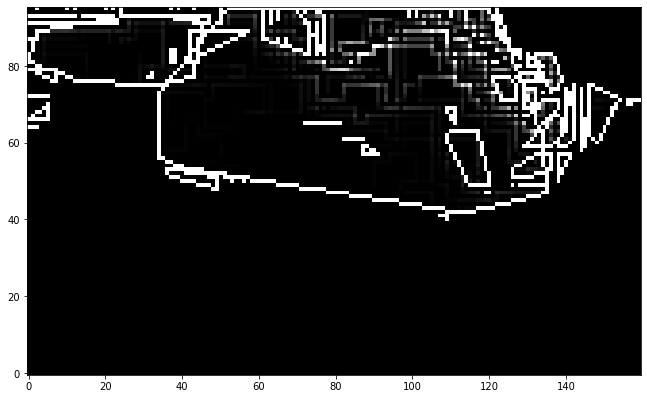

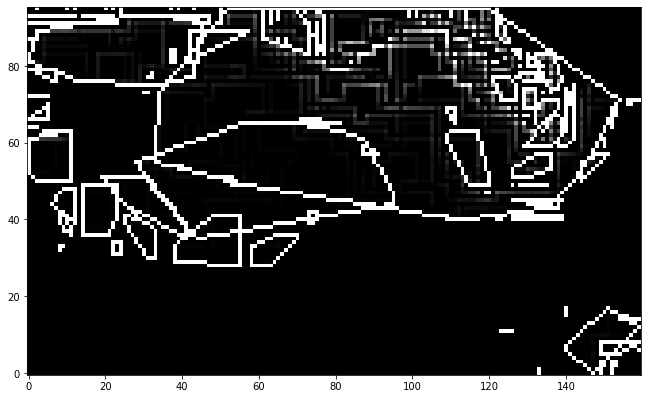

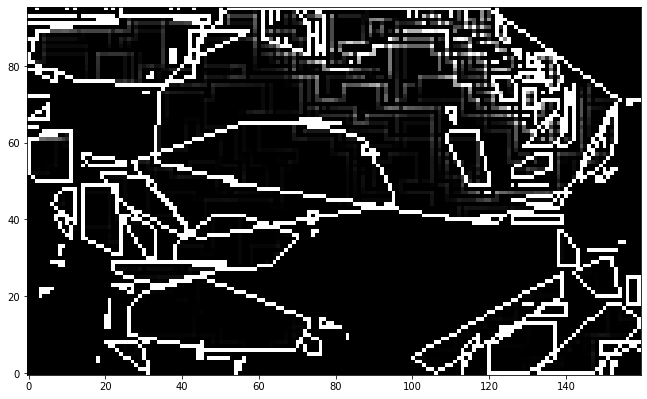

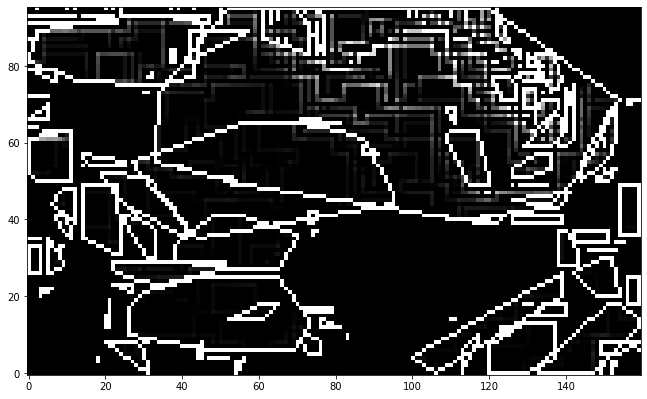

In [ ]:
## test 28/03

test_global_lap2 = global_laplacian.copy()

#test_contour = image_laplacian.copy()
#edge = cv2.Canny(image_contour, colgrid.min(), colgrid.max())

i = 0
for image in range(len(test_global_lap2) - 1):
  print("i", i)
  if i == 0:
    image1 = test_global_lap2[i]
  else:
    image1 = image3

  image2 = test_global_lap[i + 1]
  image3 = cv2.addWeighted(image1,1,image2,.7,0)

  test_contour = image3.copy()
  edge = cv2.Canny(test_contour, colgrid.min(), colgrid.max())

  contours2, h = cv2.findContours(test_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours2 = sorted(contours2, key=cv2.contourArea, reverse=True)

  for c in contours2:
    hull = cv2.convexHull(c)
    cv2.drawContours(test_contour, [hull], 0, (255,255, 255), 1)

  f, (ax1) = plt.subplots(1, 1, figsize = (11,8))
  ax1.imshow(test_contour, cmap="gray")
  ax1.invert_yaxis()
  f.savefig(DIR_TEST + image_type + "/findContours/" + image_type + "_contours_" + str(year) + "-" + str(month) + "-" + str(day) + "_deg_" + str(degree) + "_i_0" + str(i) + ".png", pad_inches=.01)
  i += 1


degree 1.25 size 0.625
2008 5 31
end read nc


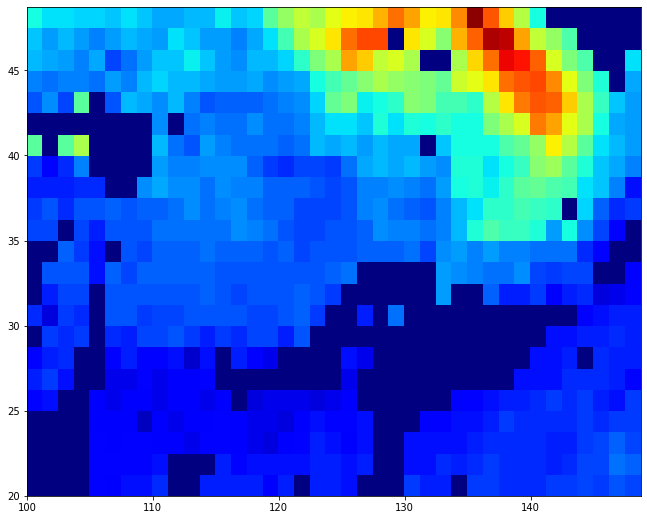

In [ ]:
_deg = .125
_size = .0625

for i in range(10,11):
  if (i==0):
    continue

  degree = _deg * i  # 0.625 
  size = (degree * _size) /  _deg  # 0.3125
  print("degree", degree, "size", size)
  thres=(i-20)
  iteration=i
  image_name = DIR_TEST + image_type+"-mesh-"+str(year)+"%02d"%month+"%02d"%day+"-i-0"+str(i)+".png"
  # plot_sequence_images(degree = deg2, size = size2, thres=(i-20), iteration=i, image_type=image_type, day=day )

  lat_g = np.arange(20.,50.,degree)
  lon_g = np.arange(100.,150.,degree)

  #initialization
  colgrid = np.zeros([lat_g.shape[0],lon_g.shape[0]], np.uint8)
  
  for year in range(2008,2009):
    for month in range(5,6):
      ndays = calendar.mdays[month] + (month==2 and calendar.isleap(year))
      print(year,month,ndays)

      for dd in range (day,day+1):
        
        fname = DIR+'IASIdaily_'+str(year)+"%02d"%month+"%02d"%dd+'.nc'

        #read IASI data in nc archive
        if not(os.path.isfile(fname)):
          continue

        nc = netCDF4.Dataset(fname)
        flg = nc.variables['flag'][:]
        mask1 = (flg == 0)

        lat = nc.variables['lat'][mask1]
        lon = nc.variables['lon'][mask1]
        col = nc.variables[image_type][mask1]
        nc.close()
      
        print('end read nc')

        mask2 = (np.isnan(col) == False) 

        # gridding the data
        for ilat in range(lat_g.shape[0]):
          for ilon in range(lon_g.shape[0]):
            # Grille régulier
            # 25 km
            # 0 25 degrée lattitude et longitude

            # Grille regulier of 0.125 degree
            maskgrid = (lat[:] >= (lat_g[ilat] - size)) & (lat[:] < (lat_g[ilat] + size)) & (lon[:] >= (lon_g[ilon] - size)) & (lon[:] < (lon_g[ilon] + size))
            
            # Defining invalid data
            mask = mask2 & maskgrid

            # Add a media filter for the grill regulier
            isMask = (len(col[mask]) != 0) & (col[mask] >= thres).all()

            if len(col[mask]) != 0:
              median = np.mean(col[mask])
              colgrid[ilat,ilon] = median

        # We mark the values at colgrid as invalid because they are maybe false positives or bad sampling
        #colgrid = ma.masked_values(colgrid, 0.)

        v_x, v_y = np.meshgrid(lon_g, lat_g)
        gradx, grady = np.gradient(colgrid, edge_order=1)

        #bigger_points = ndimage.grey_dilation(colgrid, size=(3, 3), structure=np.ones((3, 3)))
        
        # Plot the original
        fig1, (f1ax1) = plt.subplots(1, 1, figsize=(11,9))
        f1ax1.pcolormesh(v_x, v_y, colgrid, shading='nearest',cmap='jet', vmin=colgrid.min(), vmax=colgrid.max())

(24, 40) 148.75
(24, 40) 48.75
(24, 40) min: 0 max: 72 16.413541666666667


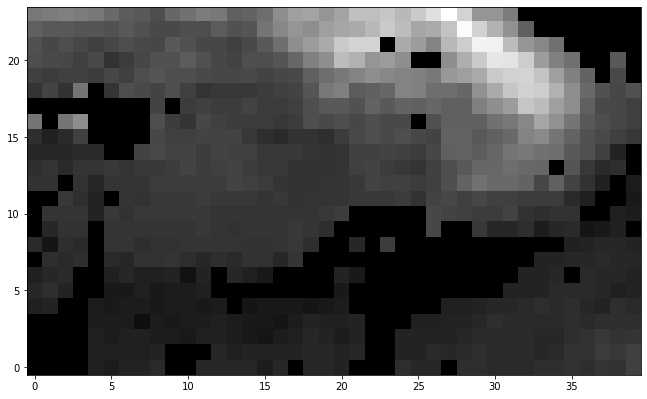

In [ ]:
print(v_x.shape, v_x.max())
print(v_y.shape, v_y.max())
print(colgrid.shape, "min:",colgrid.min(), "max:",colgrid.max(), np.mean(colgrid))

#import numpy as np, cv2
data = np.full((colgrid.shape[0], colgrid.shape[1]), colgrid, np.uint8)
img_bgr = cv2.cvtColor(data, cv2.COLOR_GRAY2BGR)
init_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
init_gray = cv2.normalize(init_gray, np.ones((lon_g.shape[0], lat_g.shape[0])) , 0, 255, cv2.NORM_MINMAX )

gray2 = init_gray.copy()

f1, ax1 = plt.subplots(1, 1, figsize=(11,8))
ax1.imshow(init_gray , cmap="gray")
ax1.invert_yaxis()

In [ ]:
def create_mask(image):
    #gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur( image, (9,9), 0 )
    _,thresh_img = cv2.threshold( blurred, 0, 255, cv2.THRESH_BINARY)
    thresh_img = cv2.erode( thresh_img, None, iterations=7 )
    #thresh_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, np.ones((6,6),np.uint8), iterations = 5)

    #thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    labels = measure.label( thresh_img, neighbors=8, background=0 )
    mask = np.zeros( thresh_img.shape, dtype='uint8' )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype='uint8' )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add( mask, labelMask )
    return mask

def fillhole(input_image, min_v=int(colgrid.min()), max_v=int(colgrid.max())):
    '''
    input gray binary image  get the filled image by floodfill method
    Note: only holes surrounded in the connected regions will be filled.
    :param input_image:
    :return:
    '''
    im_flood_fill = input_image.copy()

    h,w = im_flood_fill.shape
    seed = (int(w/2),int(h/2))
    mask = np.zeros((h + 2, w + 2), np.uint8)
    im_flood_fill = im_flood_fill.astype("uint8")

    print("minmax",min_v,max_v)

    num,im,mask_image,rect = cv2.floodFill(im_flood_fill, mask, seed, 255, min_v, max_v)
    mask_image = cv2.resize(mask_image, (w,h), interpolation = cv2.INTER_AREA)

    im_flood_fill_inv = cv2.bitwise_not(im_flood_fill)
    img_out = input_image | im_flood_fill_inv

    print("the size is", mask_image.shape)

    return mask_image

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(170 * labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    plt.imshow(labeled_img)

In [ ]:
low_blue_rgb = np.uint8([[[ 255,0,0]]])  
low_blue_hsv = cv2.cvtColor(low_blue_rgb,cv2.COLOR_RGB2HSV)
print(low_blue_hsv)

_hs = np.uint8([[[130,255,255 ]]])
_rg = cv2.cvtColor(_hs,cv2.COLOR_HSV2RGB)
print(_rg)


[[[  0 255 255]]]
[[[ 85   0 255]]]


In [ ]:
#img = cv2.imread(DIR_TEST + 'ref-map.png')

#img = cv2.imread(image_name)
#M = np.float32([[1, 0, -40], [0, 1, -30]])
#img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# reds 
#low_reds = np.array([0,104,64], dtype=np.uint8) # RGB: 64, 38, 38
#high_reds = np.array([100,255,255], dtype=np.uint8)

#Azules:
#low_blues = np.array([110,50,50], dtype=np.uint8) # RGB: 40,43,50
#high_blues = np.array([130,255,255], dtype=np.uint8) # RGB: 85,0,255

#lows = np.array([1,1,1], dtype=np.uint8)
#highs = np.array([255,255,255], dtype=np.uint8)

#global_mask = cv2.inRange(hsv, lows, highs)

#dist = cv2.bitwise_and(img, img, mask=global_mask)
#gray = cv2.cvtColor(dist, cv2.COLOR_BGR2GRAY)

#print(gray.shape, type(gray))

## Display it
#f1, ax1 = plt.subplots(1, 1, figsize=(11,8))
#ax1.imshow(img , cmap="gray")

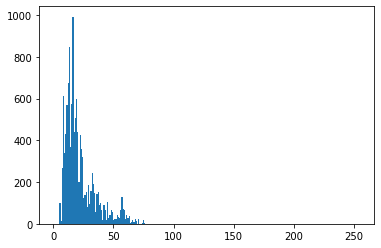

In [ ]:
f2, ax2 = plt.subplots(1,1)
ax2.hist(gray.ravel(),255,[1,254])
plt.show()

In [ ]:
# Conductivité de Tukey
def phi_1(gradI, k):
    return np.exp(-np.square(gradI / k))

# Conductivité de Lorentz
def phi_2(gradI, k):
    return 1 / (1 + np.square(gradI / k))


def Diffusion(im, steps, b, method=phi_1, l=0.25):
    """
    Arguments:
        :im: ndarray to be filterred
        :steps: number of time steps to compute
        :b: factor in conduction coefficient computation
        :method: [1|2] conduction function to use (phi_1 or phi_2)
        :l: (0<lamb<=0.25) lambda in the scheme (CFL)
    
    Returns:
        The image filterred
    """
    temp = np.zeros(im.shape, dtype=im.dtype)
    # Iterate over "time"
    for t in range(steps): 
        # Compute the gradients over the 4 directions
        dn = im[:-2,1:-1] - im[1:-1,1:-1] 
        ds = im[2:,1:-1] - im[1:-1,1:-1] 
        de = im[1:-1,2:] - im[1:-1,1:-1] 
        dw = im[1:-1,:-2] - im[1:-1,1:-1] 

        # Multiply by diffusion coefficients
        temp[1:-1,1:-1] = im[1:-1,1:-1] + l * (method(dn,b)*dn + method(ds,b)*ds + method(de,b)*de + method(dw,b)*dw) 
        # Apply scheme
        im = temp 
    return im

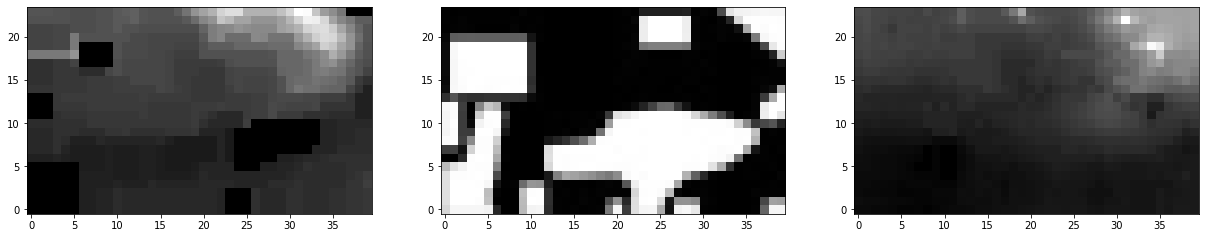

In [ ]:
kernel = np.ones((2,2),np.uint8)

gray = init_gray.copy()

#opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations = 1)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations = 2)
#blurred = cv2.GaussianBlur( opening, (3,3), 0 )

mask_path_img = DIR_TEST + 'test_image_ps3.jpg'
#mask_path_img = 'mask_2.jpg"'

mask_file = cv2.imread(mask_path_img, cv2.IMREAD_GRAYSCALE)
mask_file = cv2.resize(mask_file, (closing.shape[1],closing.shape[0]), interpolation = cv2.INTER_AREA)

#mask = fillhole(closing)
#mask = cv2.erode( mask, None, iterations=1 )

_, bin_gray = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
bin_gray = cv2.morphologyEx(bin_gray, cv2.MORPH_DILATE, np.ones((6, 6), dtype=int))

blurred_paint = cv2.inpaint(closing, mask_file, 6, cv2.INPAINT_TELEA)

gray = blurred_paint.copy()
global_mask = mask.copy()

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize = (21,18))
ax1.imshow(closing, cmap="gray")
ax1.invert_yaxis()
ax2.imshow(mask_file, cmap="gray")
ax2.invert_yaxis()
ax3.imshow(gray, cmap="gray")
ax3.invert_yaxis()

(24, 40)


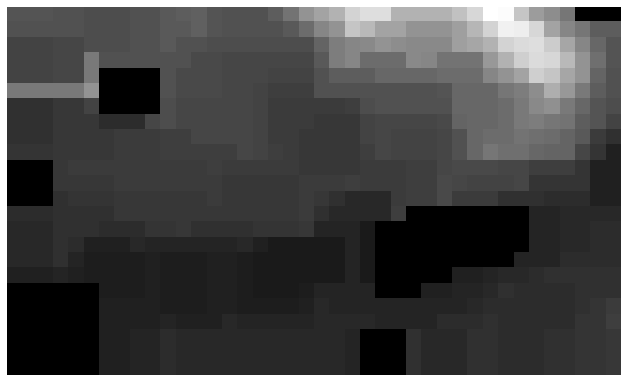

In [ ]:
test_g = blurred_paint.copy()
_,thr = cv2.threshold(test_g,1,255,cv2.THRESH_BINARY)
print(closing.shape)
f, (ax1) = plt.subplots(1, 1, figsize = (11,8))
ax1.imshow(closing, cmap="gray")
ax1.axis('off')
ax1.invert_yaxis()

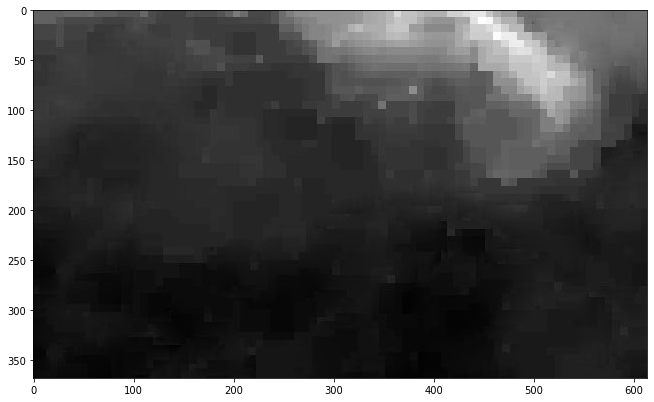

In [ ]:

ps_image = cv2.imread(DIR_TEST + 'test_image_ps1.jpg' , cv2.IMREAD_GRAYSCALE)
f, (ax1) = plt.subplots(1, 1, figsize = (11,8))
ax1.imshow(ps_image, cmap="gray")
#ax1.invert_yaxis()

(48, 80)


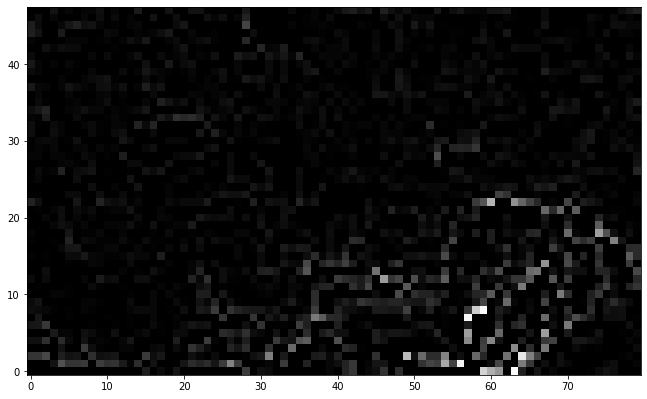

In [ ]:
image_dist = cv2.imread(DIR_TEST + 'test_image_ps1.jpg', cv2.IMREAD_GRAYSCALE)
image_dist = cv2.resize(image_dist, (80,48), interpolation = cv2.INTER_AREA)

#image_dist = _cami_.copy()

lap_dist = cv2.Laplacian(src=image_dist, ddepth=cv2.CV_8U, ksize=1)
lap_dist = np.uint8(np.absolute(lap_dist))

print(image_dist.shape)

f, (ax1) = plt.subplots(1, 1, figsize = (11,8))
ax1.imshow(lap_dist, cmap="gray")
ax1.invert_yaxis()
#f.savefig("gray-image-test2.png", pad_inches=1)

0 iteration 0
0 iteration 1
0 iteration 2
0 iteration 3
1 iteration 4
3 iteration 5
3 iteration 6
2 iteration 7
4 iteration 8
2 iteration 9
1 iteration 10
5 iteration 11
1 iteration 12
4 iteration 13
6 iteration 14
6 iteration 15
8 iteration 16


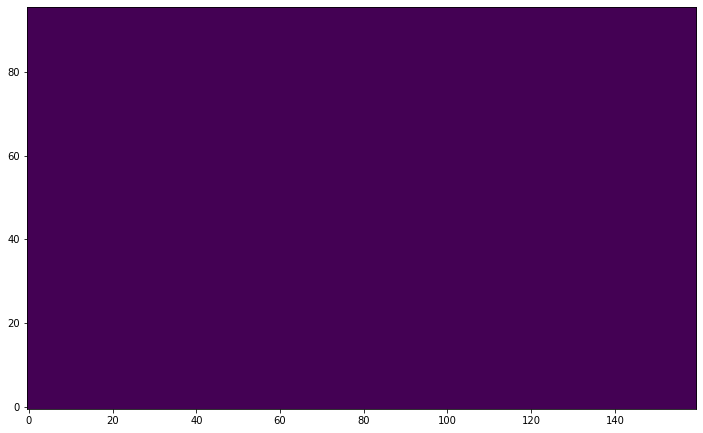

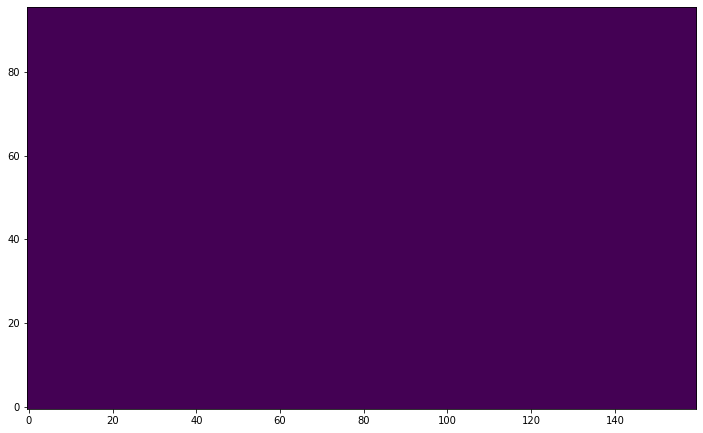

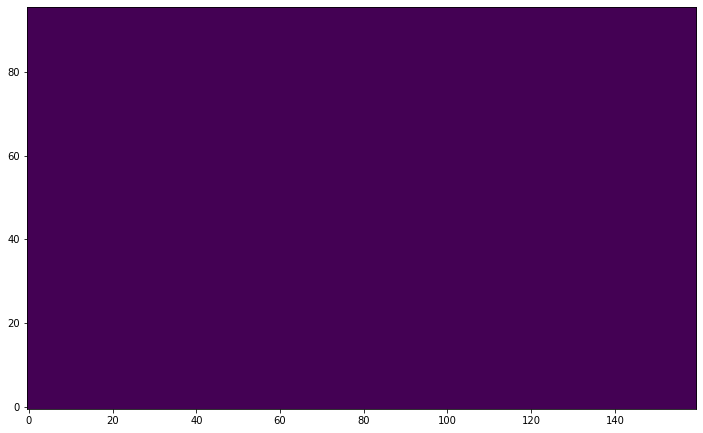

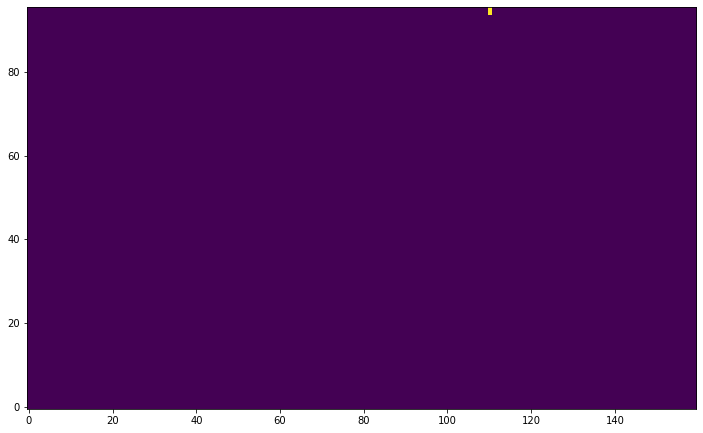

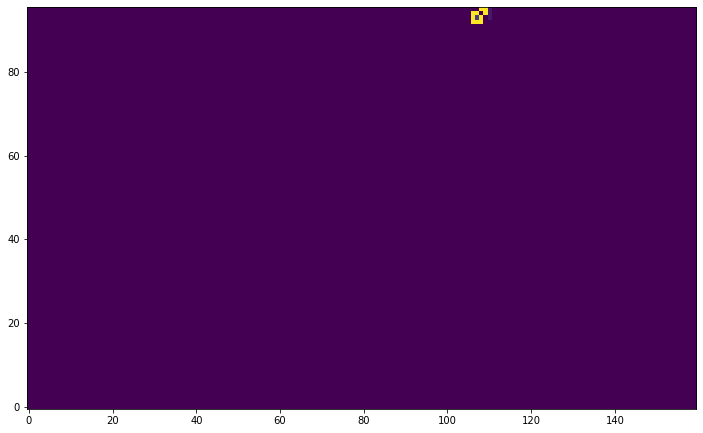

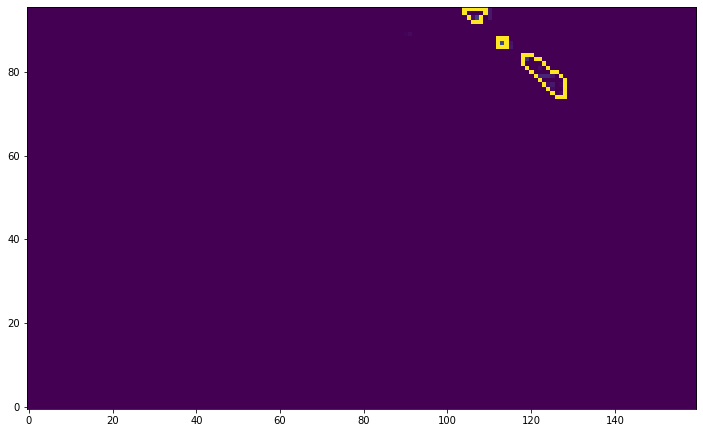

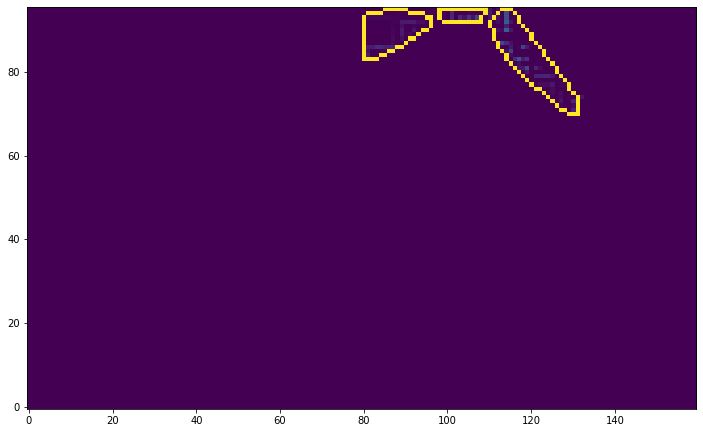

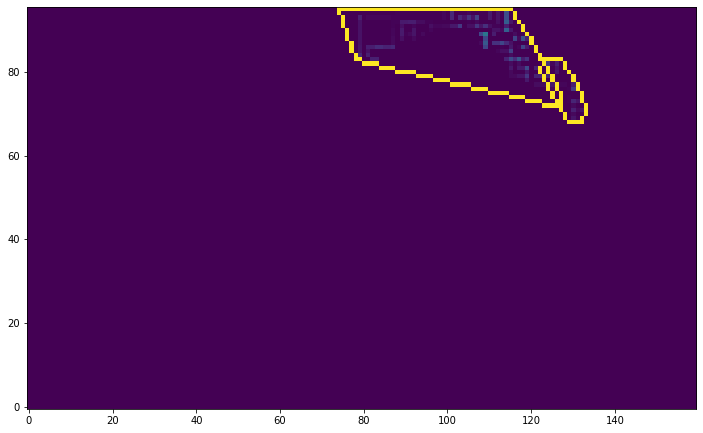

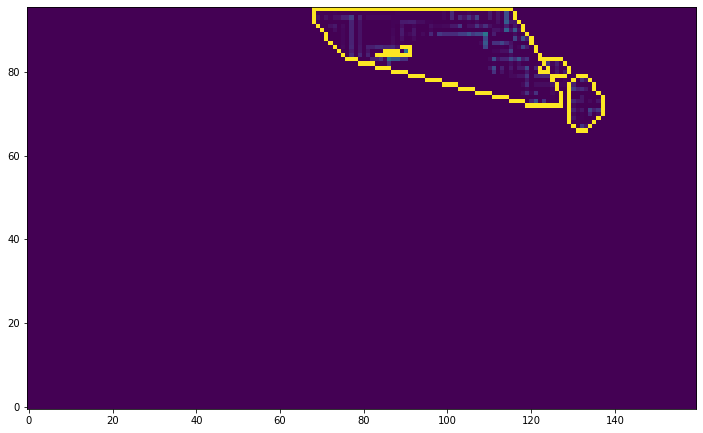

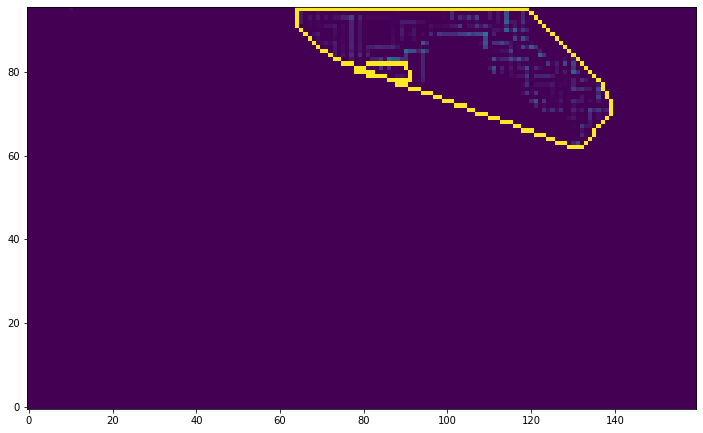

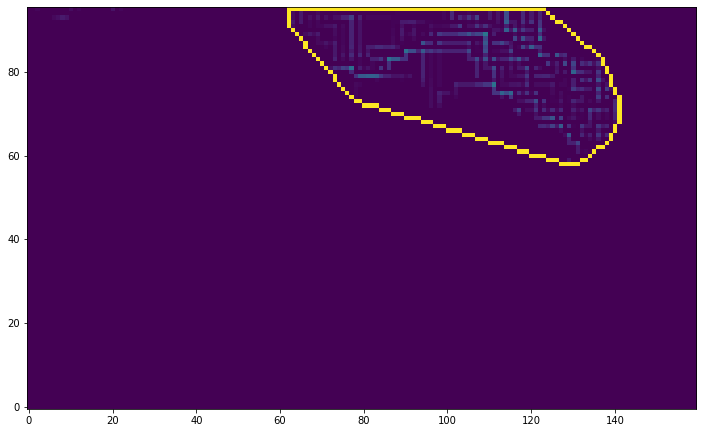

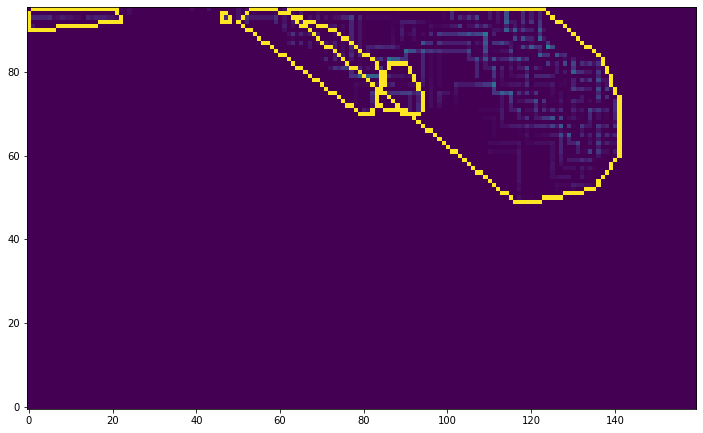

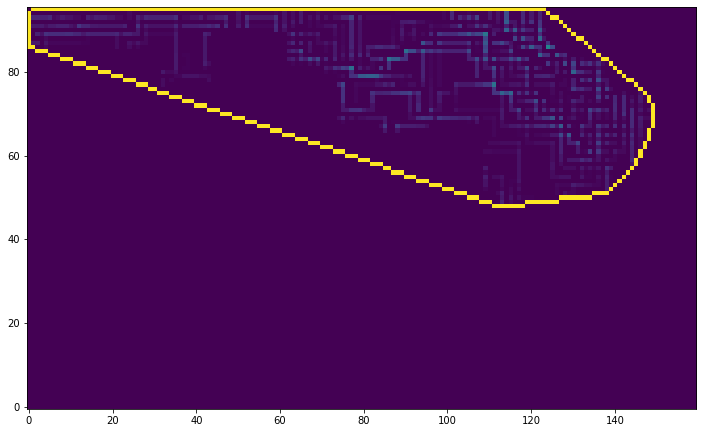

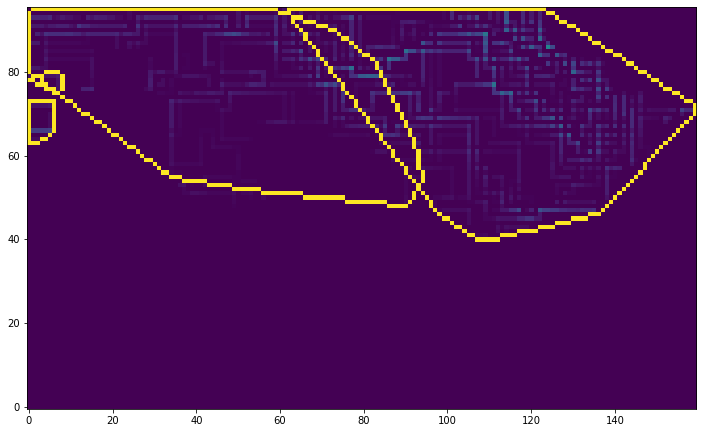

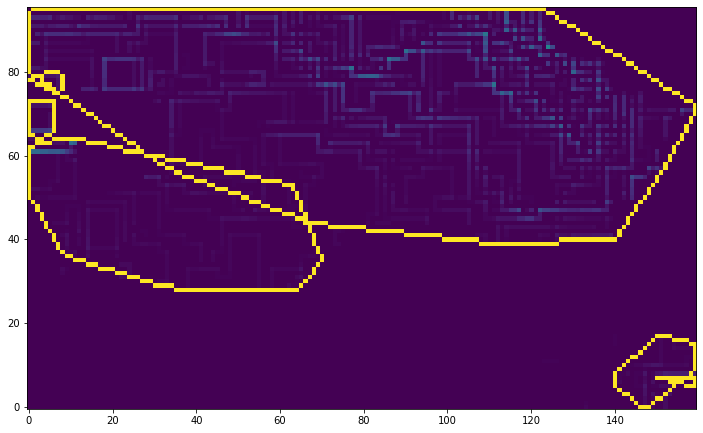

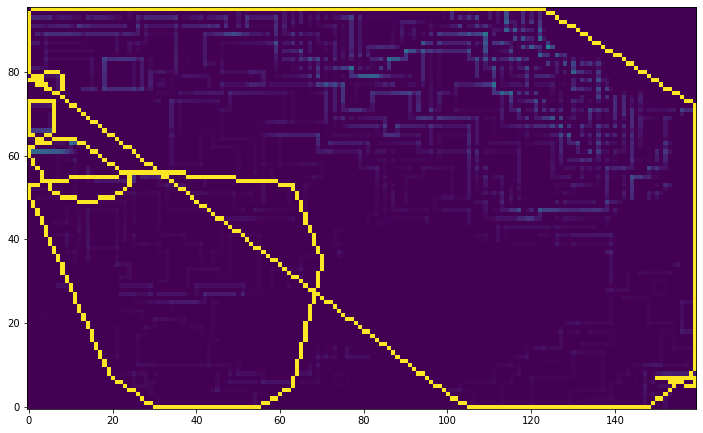

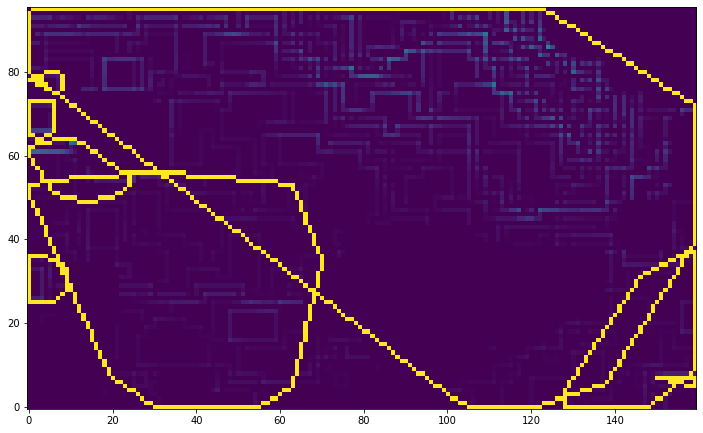

In [ ]:
global_contours_temp = global_contours.copy()
global_contours_ar = np.array(global_contours_temp, dtype=np.object)

i=0
#temp = image3.copy()
temp = test_global_lap.copy()

for contours in global_contours_ar:
  print(len(contours), "iteration", i)
  _temp_contours = temp[i].copy()
  for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(_temp_contours, [hull], 0, (255,255, 255), 1)
  fig, ax = plt.subplots(1, figsize=(12,8))
  ax.imshow(_temp_contours)
  ax.invert_yaxis()
  i+=1

0
0
0
0
0
0
1
1
3
5
6
6
8
8
10
11
12


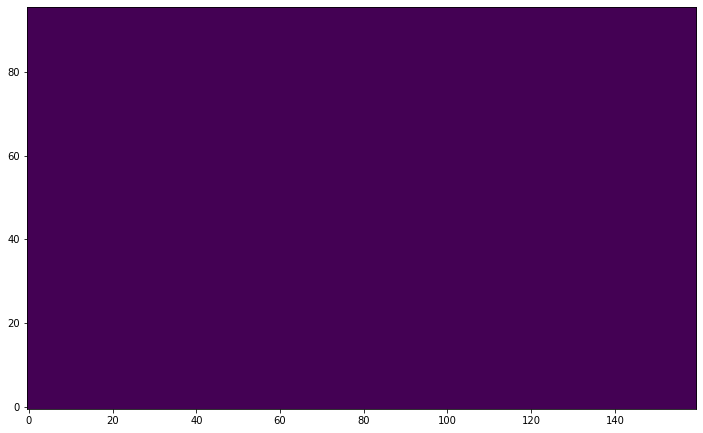

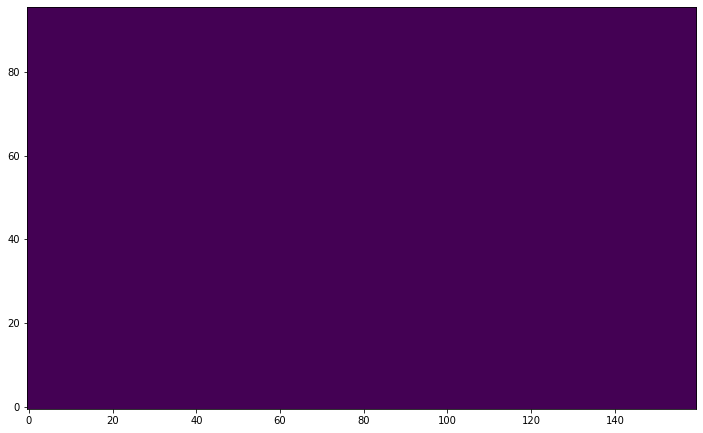

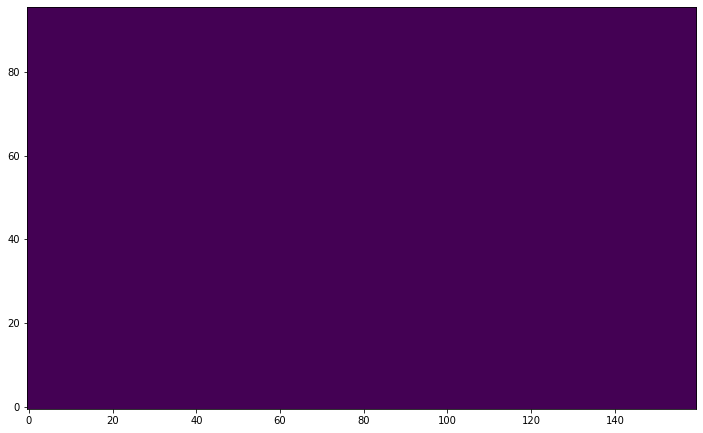

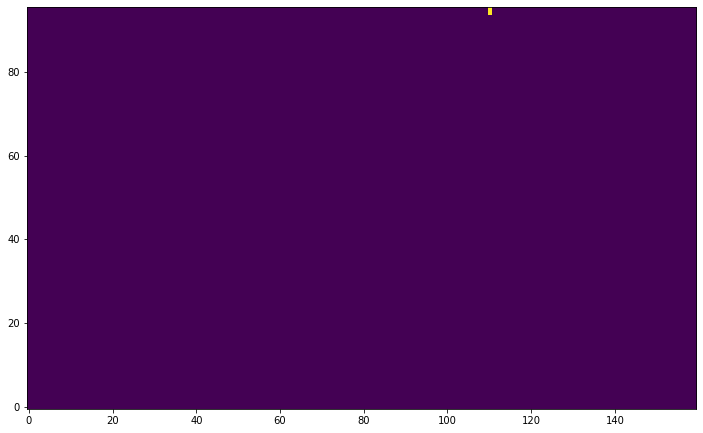

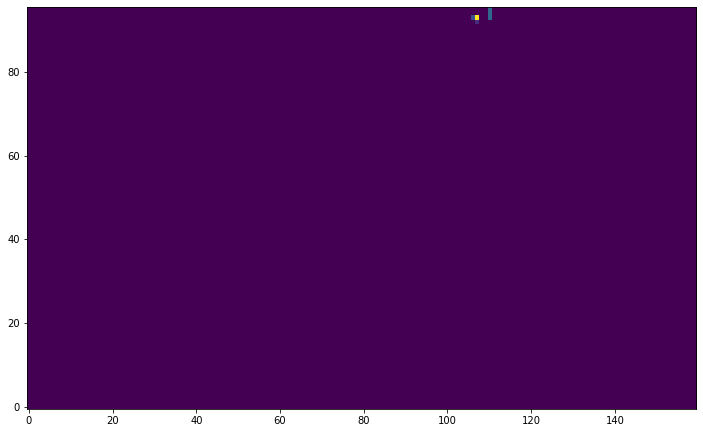

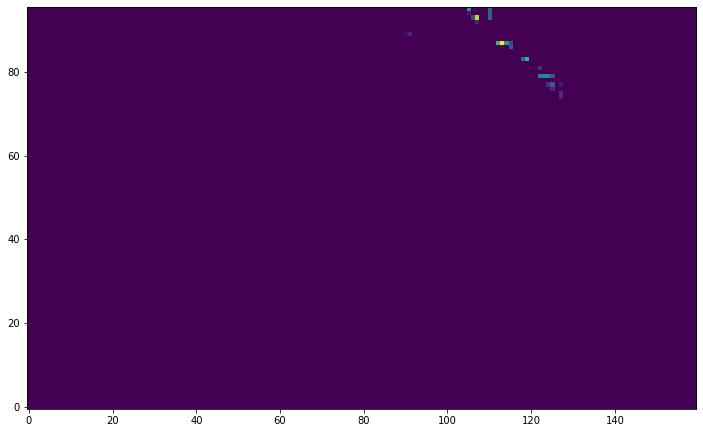

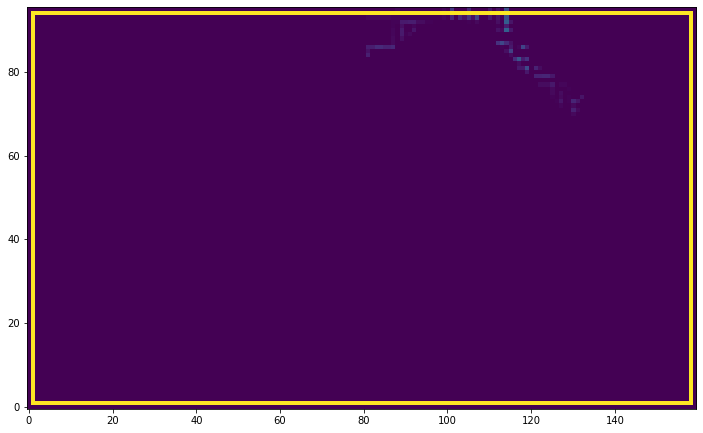

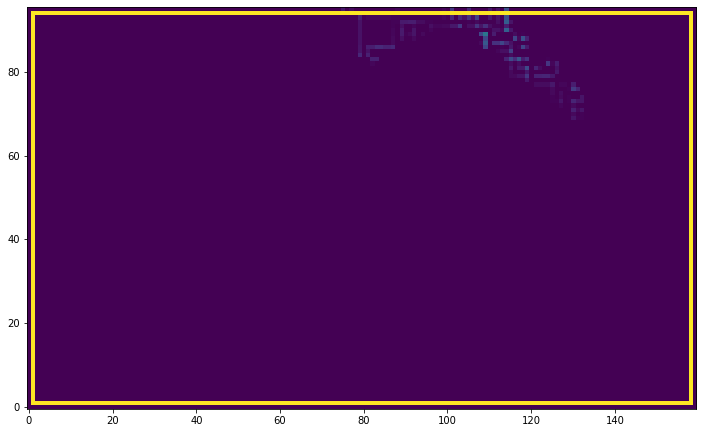

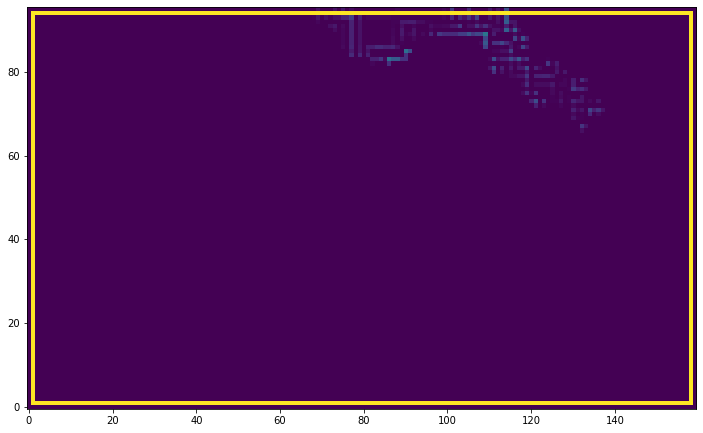

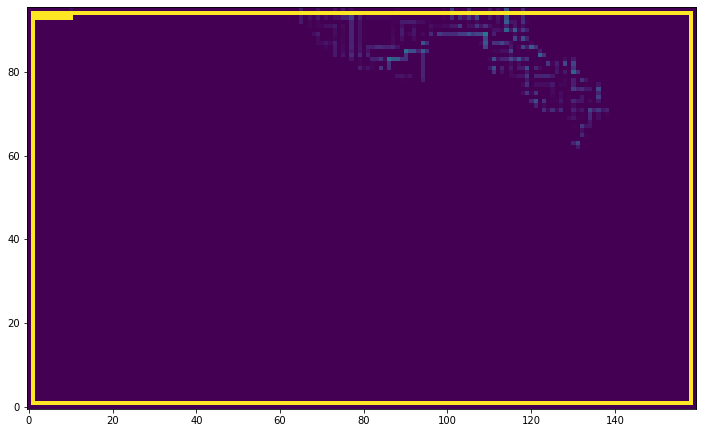

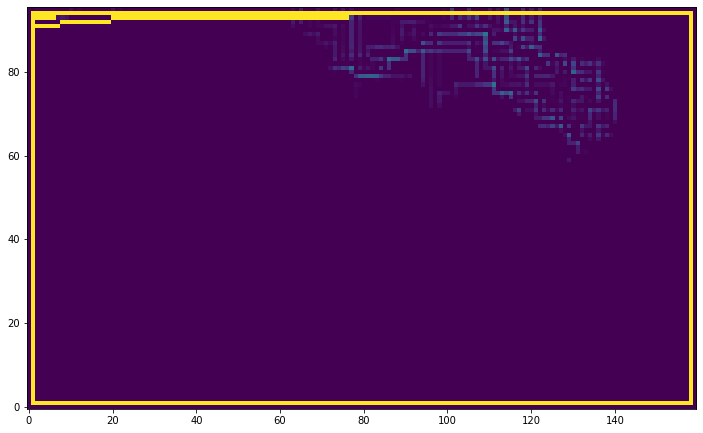

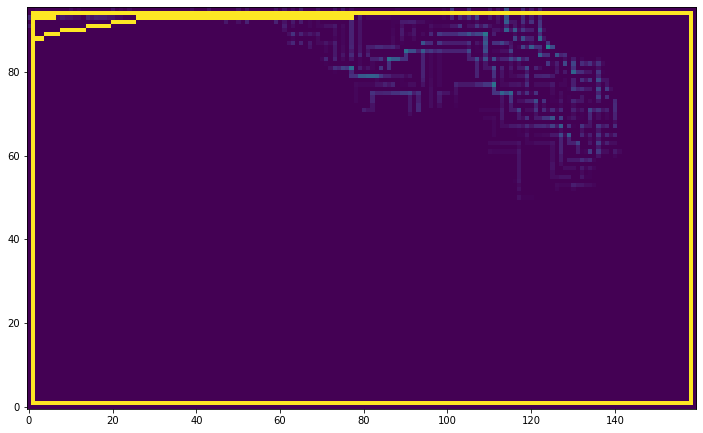

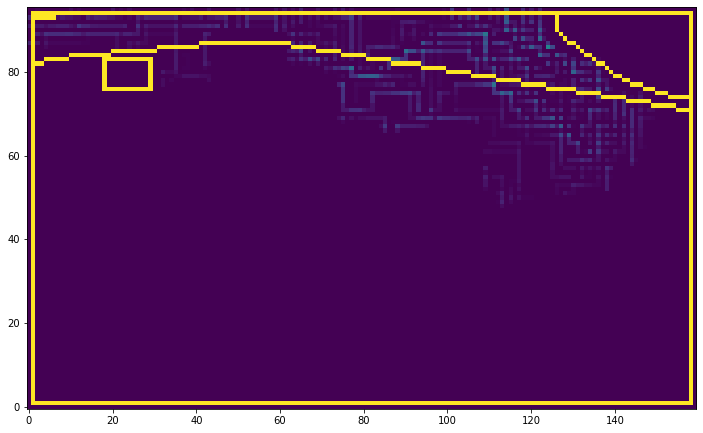

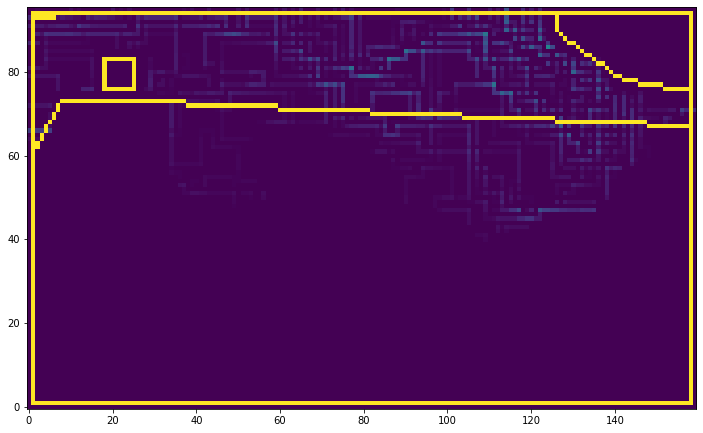

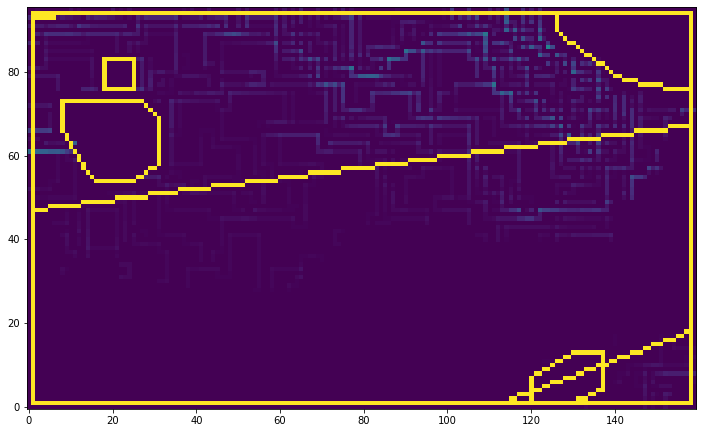

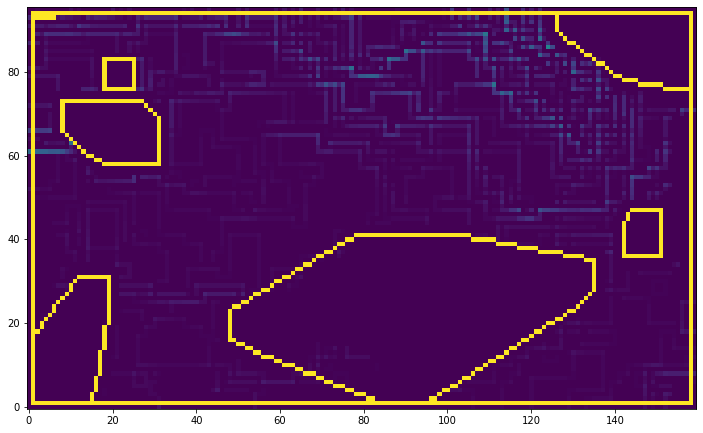

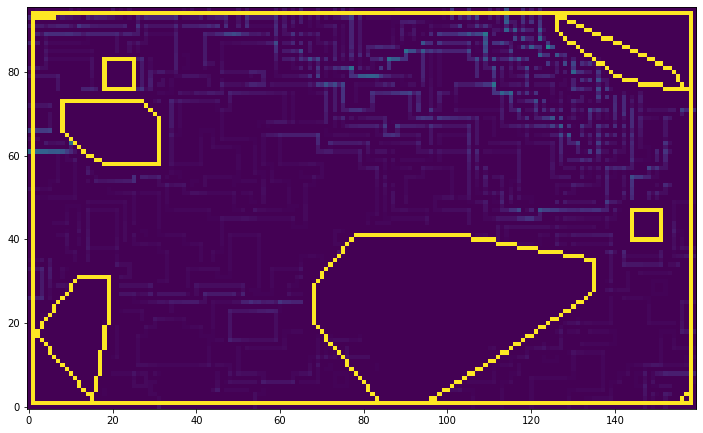

In [ ]:
global_mser_temp = global_mser.copy()
global_mser_ar = np.array(global_mser_temp, dtype=np.object)
image_contour = image3.copy()

i=0
temp2 = test_global_lap.copy()

for contours in global_mser_ar:
  print(len(contours))
  _temp_contours2 = temp2[i].copy()
  for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(_temp_contours2, [hull], 0, (255,255, 255), 1)
  fig, ax = plt.subplots(1, figsize=(12,8))
  ax.imshow(_temp_contours2)
  ax.invert_yaxis()
  i+=1

[[ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0 53 54 54  0  0]
 [ 0  0 54 94 94  0  0]
 [ 0  0 54 55 54  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0]]
--------------------------
[[[1, 0]], [[53, 54]], [[54, 54]], [[54, 54]], [[54, 54]], [[94, 94]], [[94, 94]], [[54, 55]], [[55, 54]], [[54, 55]], [[1, 0]]]


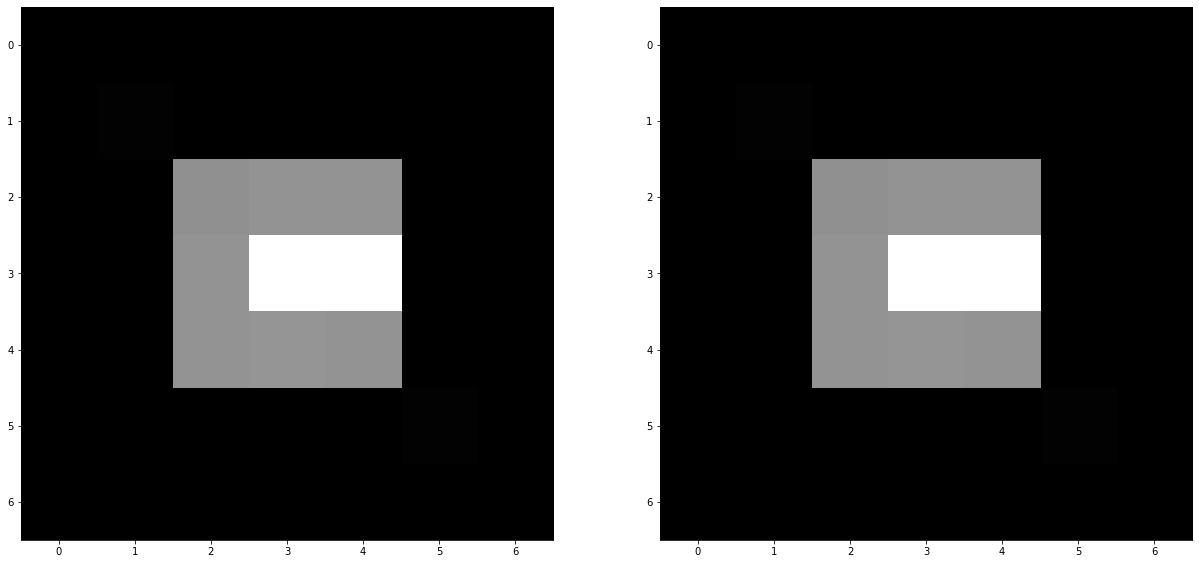

In [ ]:
#s_mask_file = gray.copy()
s_mask_file = cv2.imread(DIR_TEST + "mask_5.jpg" , cv2.IMREAD_GRAYSCALE)
ht, wd = s_mask_file.shape

temp = np.zeros([ s_mask_file.shape[0] + 2 , s_mask_file.shape[1] + 2], np.uint8)
height , width = temp.shape

final = np.zeros(temp.shape, np.uint8)

# compute center offset
xx = (width - wd) // 2
yy = (height - ht) // 2

# copy img image into center of result image
temp[yy:yy+ht, xx:xx+wd] = s_mask_file

temp = temp.astype(np.int16)

regions = []
limit = 5
i = 0
for row in range(height - 1):
  j = 0
  for col in range(width - 1):
    current = temp[i][j]
    left = temp[i][j - 1]
    right = temp[i][j + 1]
    top = temp[i - 1][j]
    bottom = temp[i + 1][j]

    if current != 0:
      inLeft = np.absolute(np.subtract(current, left)) < limit
      inRight = np.absolute(np.subtract(current, right)) < limit
      inTop = np.absolute(np.subtract(current, top)) < limit
      inBottom = np.absolute(np.subtract(current, bottom)) < limit

      myreg = []

      #if inRight or inBottom or inLeft or inTop:
      #  final[i,j] = current  
      #  myreg.append(final[i,j])

      if inRight:
        final[i,j] = current
        myreg.append([current,right])
      elif inLeft:
        final[i,j] = current
        myreg.append([current,left])
      elif inBottom:
        final[i,j] = current
        myreg.append([current,bottom])
      elif inTop:
        final[i,j] = current
        myreg.append([current,top])
      elif inBottom:
        final[i,j] = current
        myreg.append([current,bottom])

      regions.append(myreg) 

    j += 1
  i += 1

print(final)
print("--------------------------")
print(regions)

f, (ax1,ax2) = plt.subplots(1, 2, figsize = (21,18))
ax1.imshow(temp, cmap="gray")
ax2.imshow(final, cmap="gray")
#ax1.invert_yaxis()

[[0.95500183 0.         0.         0.         0.        ]
 [0.         0.95500183 0.95500183 0.95500183 0.        ]
 [0.         0.95500183 1.9100037  0.95500183 0.        ]
 [0.         0.95500183 0.95500183 0.95500183 0.        ]
 [0.         0.         0.         0.         0.95500183]]


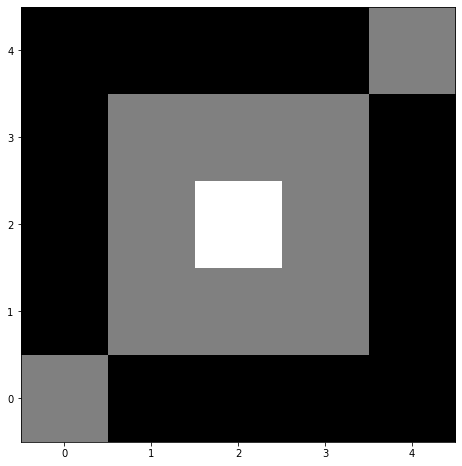

In [ ]:
dist = cv2.distanceTransform(s_mask_file, cv2.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
#cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

print(dist)

f, (ax1) = plt.subplots(1, 1, figsize = (11,8))
ax1.imshow(dist, cmap="gray")
ax1.invert_yaxis()

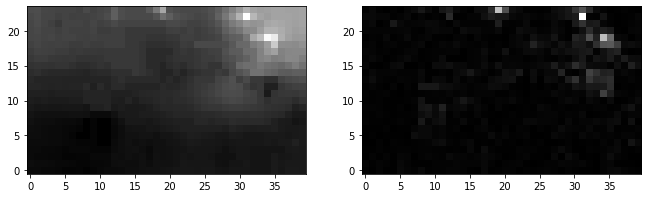

In [ ]:
## Below code convert image gradient in both x and y direction
lap = cv2.Laplacian(gray, cv2.CV_16S, ksize=1)
lap = np.uint8(np.absolute(lap))
## Below code convert image gradient in x direction
canny = cv2.Canny(gray, colgrid.min(), colgrid.max())
sobelx = cv2.Sobel(gray, 0, dx=1,dy=0)
sobelx = np.uint8(np.absolute(sobelx))
## Below code convert image gradient in y direction
sobely = cv2.Sobel(gray, 0, dx=0,dy=1)
sobely = np.uint8(np.absolute(sobely))

f, (ax,ax2) = plt.subplots(1,2, figsize=(11,8))
ax.imshow(gray, cmap="gray")
ax.invert_yaxis()
ax2.imshow(lap, cmap="gray")
ax2.invert_yaxis()

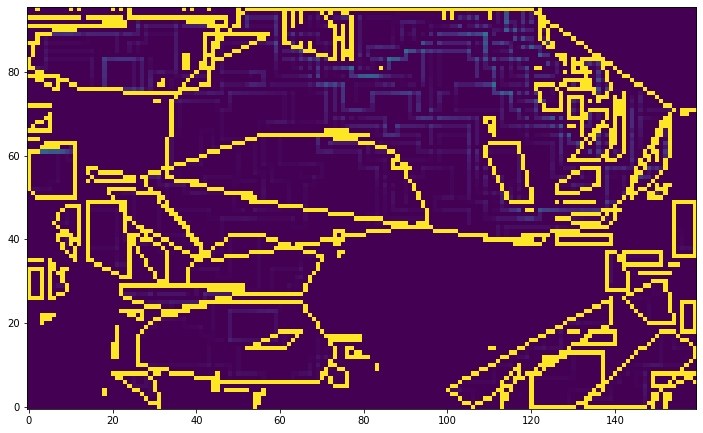

In [ ]:
# Contours

image = test_laplacian.copy()
edge = test_laplacian.copy()
# 1
#contours = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#cv2.drawContours(image, contours[0], -1, (255,0,0), thickness = 1)

## 2
#contours, h = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#contours = sorted(contours, key=cv2.contourArea, reverse=True)
#cv2.drawContours(image, contours, -1, (255,0,0), thickness = 1)

## 3
contours, h = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

for c in contours:
  hull = cv2.convexHull(c)
  cv2.drawContours(image, [hull], 0, (255,255, 255), 1)

fig, ax = plt.subplots(1, figsize=(12,8))
ax.imshow(image)
ax.invert_yaxis()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


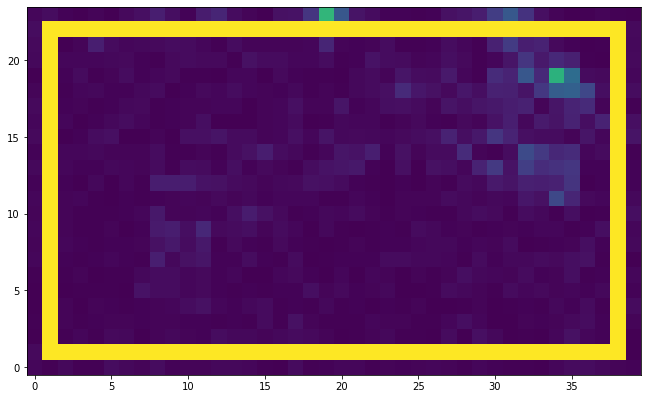

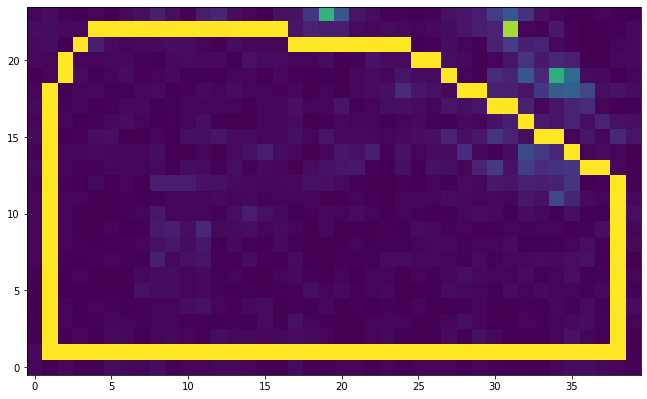

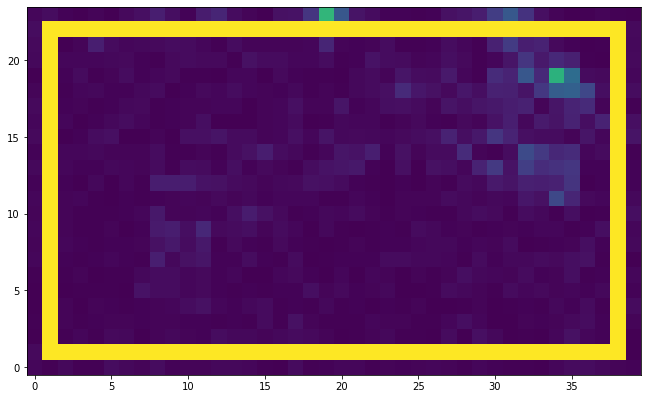

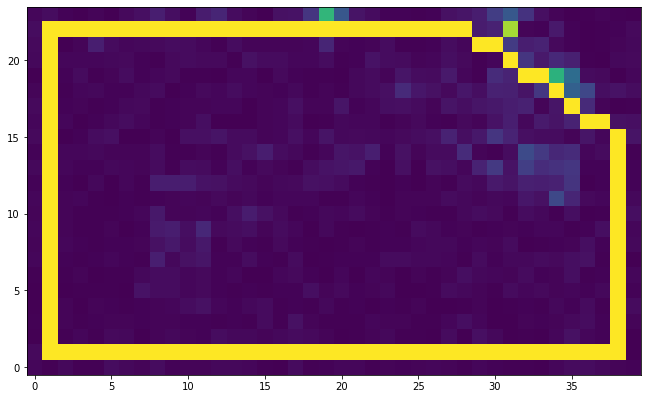

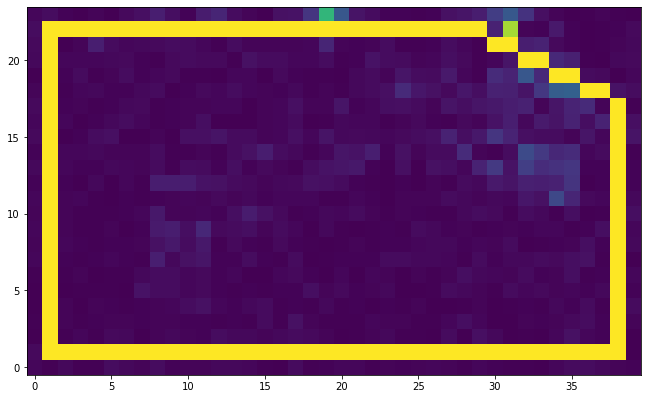

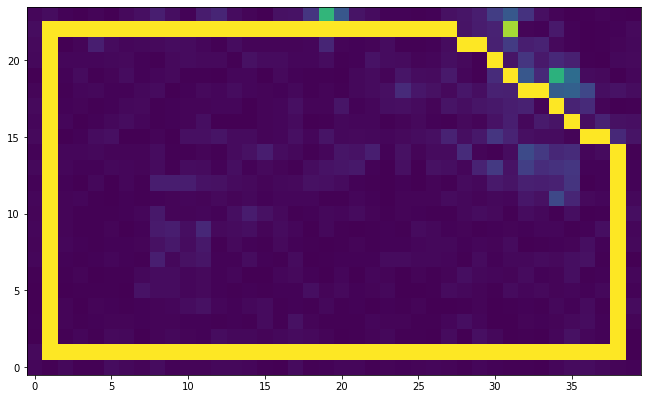

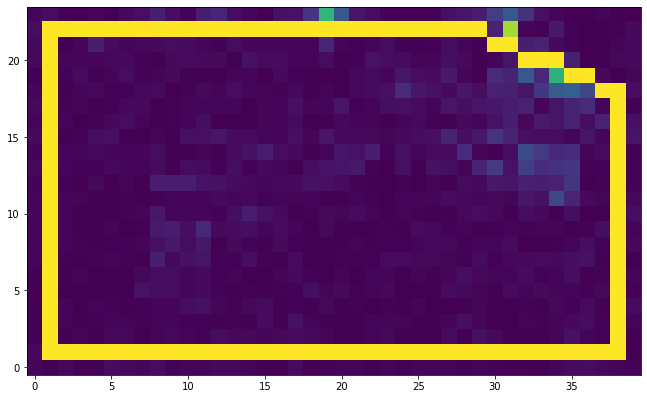

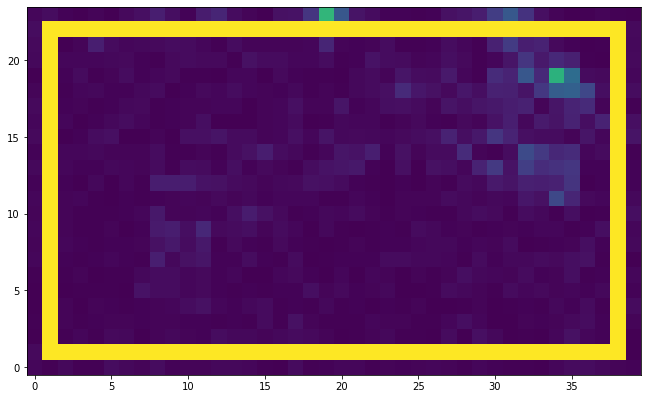

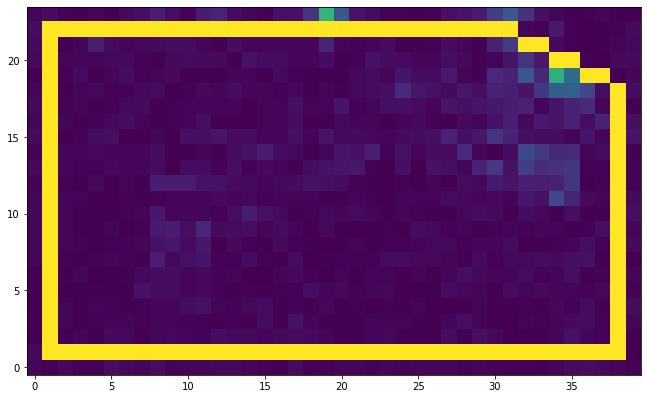

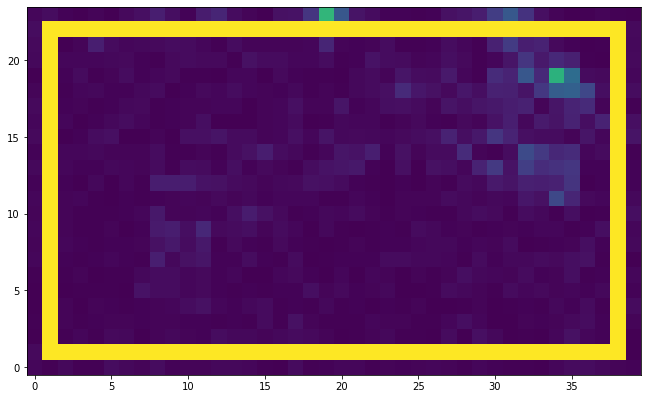

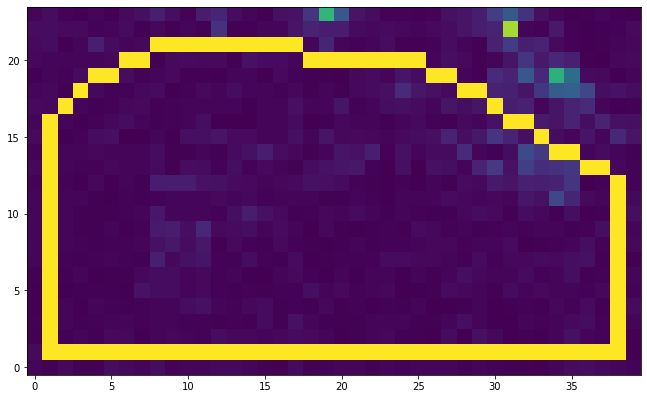

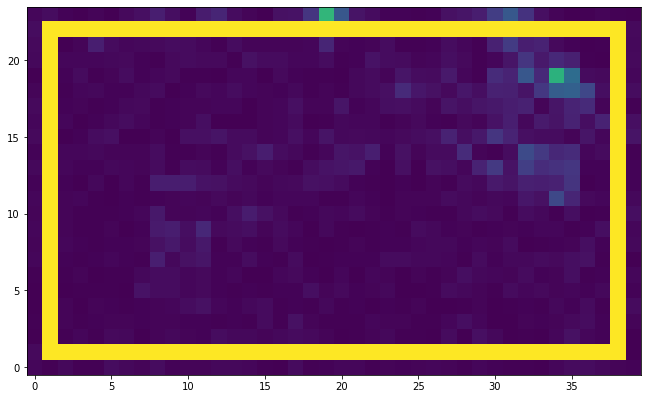

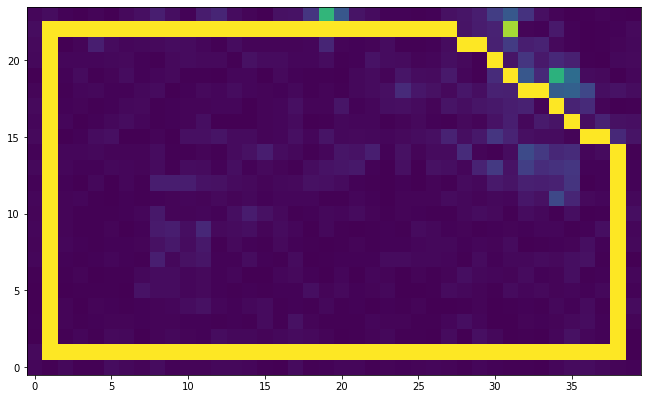

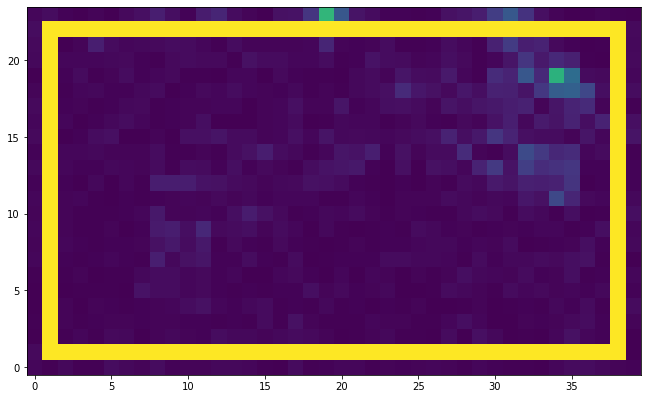

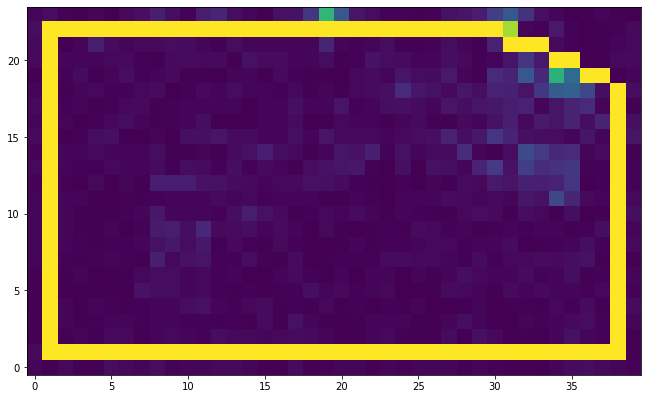

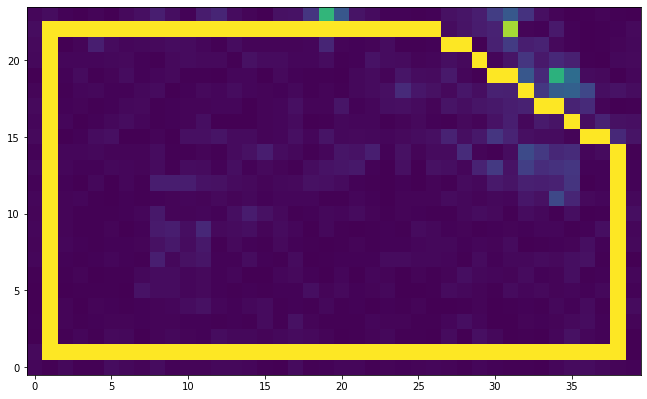

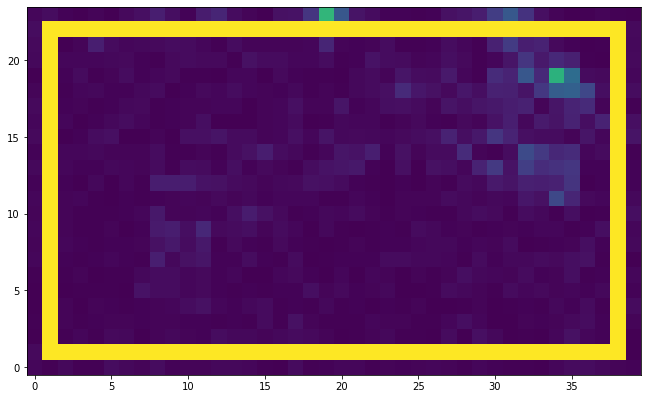

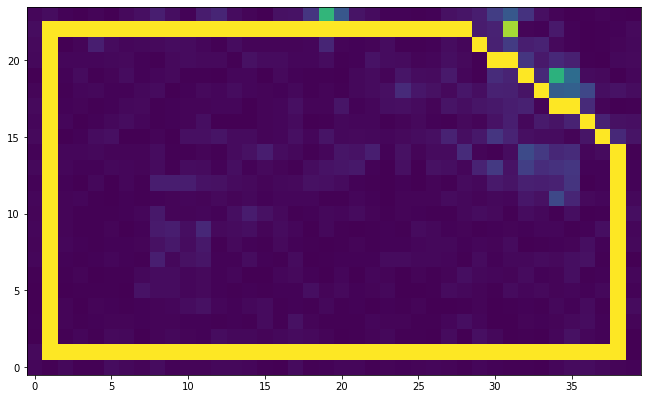

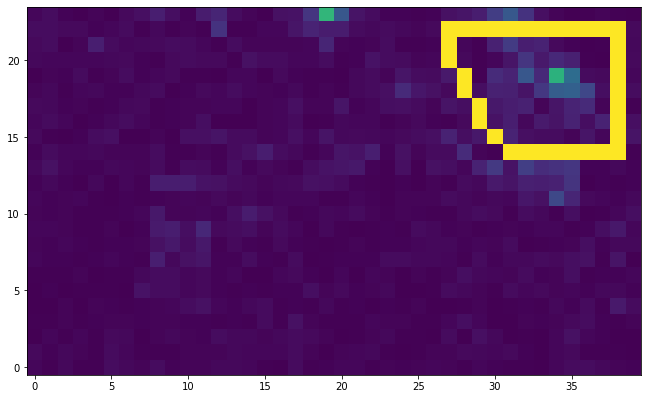

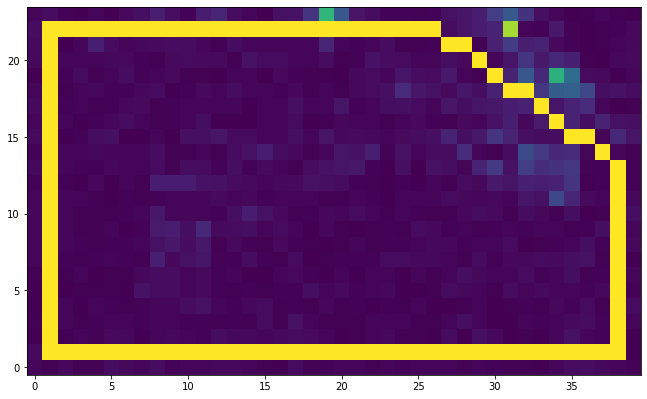

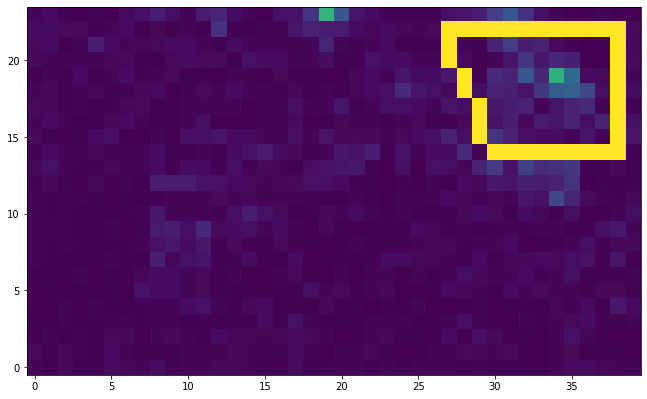

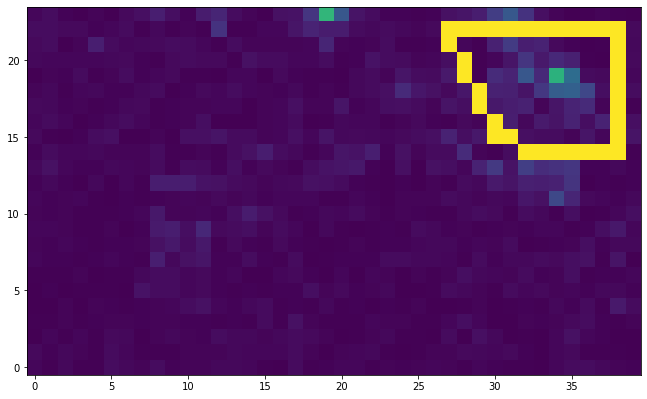

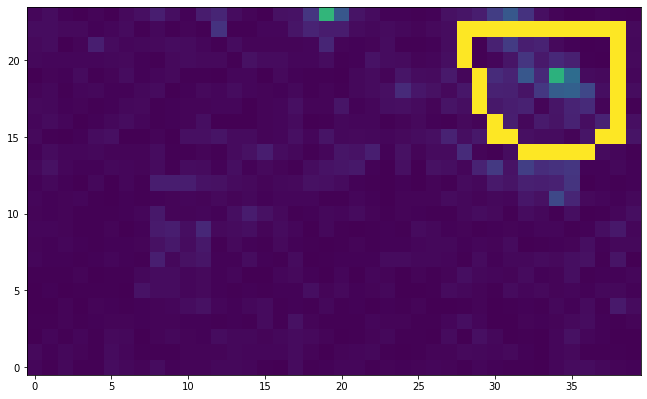

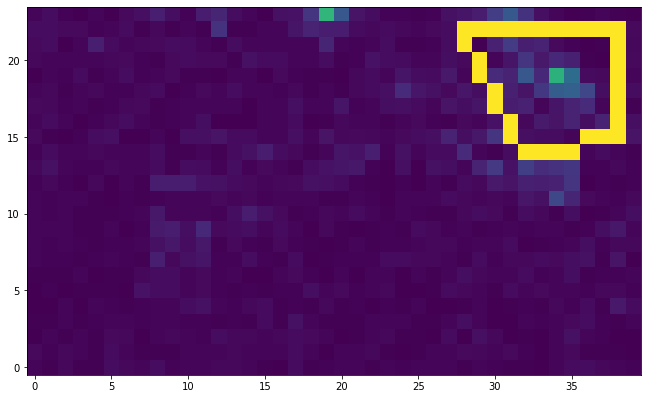

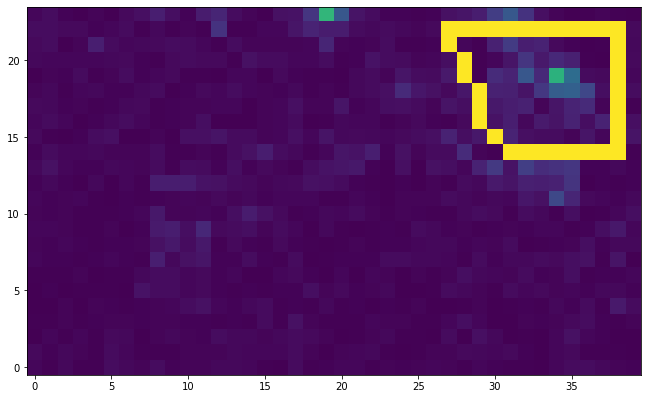

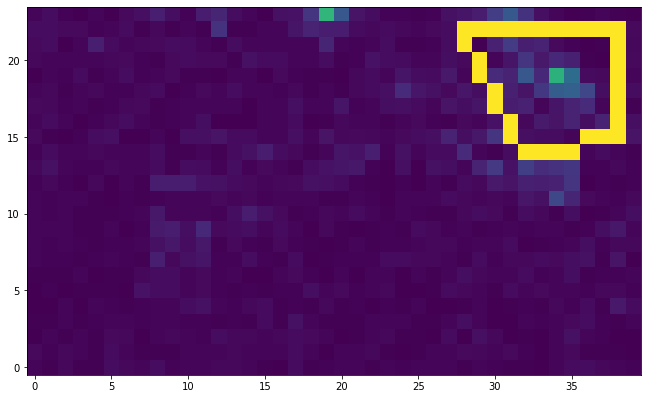

In [ ]:
#Create MSER object
mser = cv2.MSER_create()
vis = test_laplacian.copy()

#detect regions in gray scale image
regions, bboxes = mser.detectRegions(gray)

regions = sorted(regions, key=cv2.contourArea, reverse=True)

i = 0
for c in regions:
  temp = lap.copy()
  print(i)
  hull = cv2.convexHull(c)
  cv2.drawContours(temp, [hull], 0, (255,255, 255), 1)
  f, ax = plt.subplots(1, 1, figsize=(11,8))
  ax.imshow(temp)
  ax.invert_yaxis()
  #f.savefig(DIR_TEST + image_type+"-mser-"+str(year)+"%02d"%month+"%02d"%dd+"-i-0"+str(i)+".png", pad_inches=1)
  i+=1
  #if i == 3:

#hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
#isClosed = True  
## Blue color in BGR 
#color = (255, 0, 0) 
## Line thickness of 2 px 
#thickness = 1
#cv2.polylines(vis, hulls,isClosed, color, thickness) 
#f, ax = plt.subplots(1, 1, figsize=(11,8))
#ax.imshow(vis)
#ax.invert_yaxis()

In [ ]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num

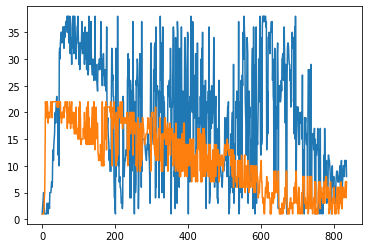

In [ ]:
plt.plot(regions[0])

num_labels 2


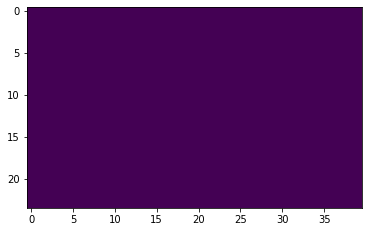

In [ ]:

connect = cv2.connectedComponentsWithStats(gray, connectivity=8, ltype=cv2.CV_32S) 

# The first cell is the number of labels
num_labels = connect[0]
# The second cell is the label matrix
labels = connect[1]
# The third cell is the stat matrix
stats = connect[2]
# The fourth cell is the centroid matrix
centroids = connect[3]

print("num_labels", num_labels)

plt.imshow(labels)

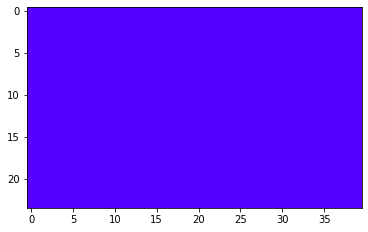

In [ ]:
imshow_components(labels)

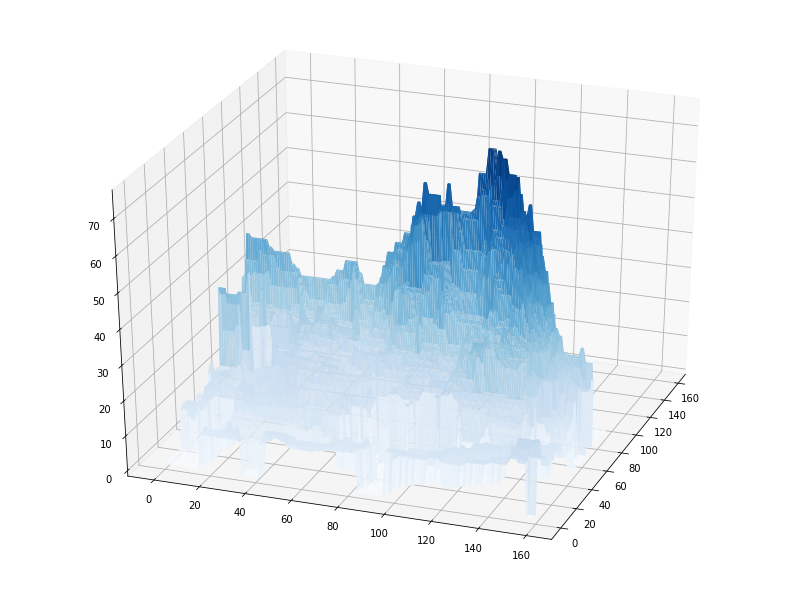

In [ ]:
perspective = orig.copy()

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:perspective.shape[0], 0:perspective.shape[1]]

fig = plt.figure(figsize = (11,8))
ax = Axes3D(fig, elev=30, azim=20)
ax.plot_surface(xx, yy, perspective ,rstride=1, cstride=1, cmap='Blues', linewidth=0)
ax.invert_yaxis()

In [ ]:
def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=5)
    border = border - cv2.erode(border, None)

    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(np.uint8)
    _, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255 / (ncc + 1))
    # Completing the markers now. 
    lbl[border == 255] = 255

    lbl = np.int32(lbl)
    cv2.watershed(a, lbl)

    lbl[lbl == -1] = 0
    lbl = lbl.astype(np.uint8)
    return 255 - lbl


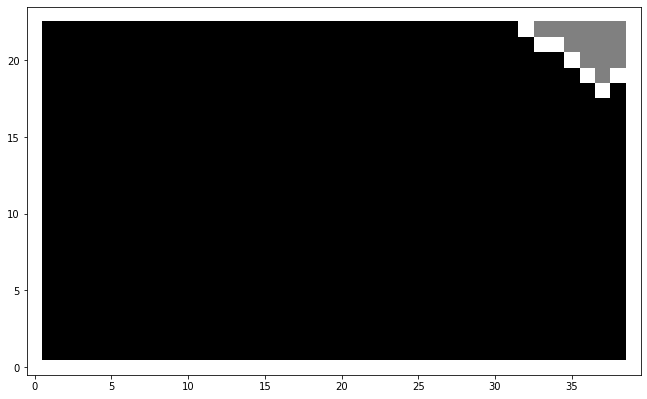

In [ ]:

# Pre-processing.
img_gray = gray.copy()

img_bgr_2 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

_, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, np.ones((3, 3), dtype=int))

result = segment_on_dt(img_bgr, img_bin)

f, ax = plt.subplots(1, 1, figsize=(11,8))
ax.imshow(result, cmap="gray")
ax.invert_yaxis()